# **Исследование игровых платформ по жанрам и регионам**
**Markdown** Целью проекта является исследование рынка игровых платформ по основным видам в трёх крупных регионах. 

Из конкретных задач:

- Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

- Проанализировать кол-во выпускаемых игр по годам

- Показать динамику продаж игр по платформам

- Вывести корреляцию продаж с оценками пользователей и критиков

- Показать продажи в разрезе жанров

- Вывести топ-5 популярных платформ и жанров

- Проверить гипотезы об совпадении пользовательских рейтингов двух платформ и двух жанров между собой

## Шаг. Импортирование необходимых библиотек и чтение файла

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Коммент:   
**В датафрейме 10 столбцов и 16715 строк. Столбцы 'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales' заполнены полностью. Есть много пропусков в столбцах 'Critic_Score', 'User_Score', 'Rating'. Так же стоить заметить, что 'Year_of_Release' типа float, 'User_Score' типа object, что нужно будет исправить. Пропуски в Critic_Score', 'User_Score',, вероятнее всего, образовались по причине отсуствия оценки, то  есть рейтинг, оценка критика либо оценка пользователя была не исслеодована по конкретной игре. Пропуски в графе рейтинг могут быть из за того, что не все игры обязаны присваивать категорию ESBR**


## Шаг. Подготовка данных

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df=df.dropna(subset=['year_of_release'])

**Коммент:  
**Перевёл названия столбцов в нижний регистр** 

In [7]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [8]:
df.loc[(df['user_score'] =="tbd"), 'user_score'] = '100.00'
df['user_score'] = df['user_score'].fillna('100.00')
df['user_score'] = pd.to_numeric(df['user_score'])

**Коммент:  
**Заполнил пропуски в 'user_score' заглушкой 1000.0, чтобы перевести весь столбец в тип int**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


**Коммент: 
**Проверка перевелись ли стодбцы в нужный тип**

In [10]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Коммент:  
**Создали новый столбец 'total_sales'**

In [11]:
df=df.dropna(subset=['name','genre'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Коммент:  
**Пропуски в name, genre и year_of_release просто удалили, так как их немного. В critic_score, user_score и rating оставили как есть, так как удалив потеряем много данных, заполнив усреднённо исказим данные**

## Шаг. Исследовательский анализ данных

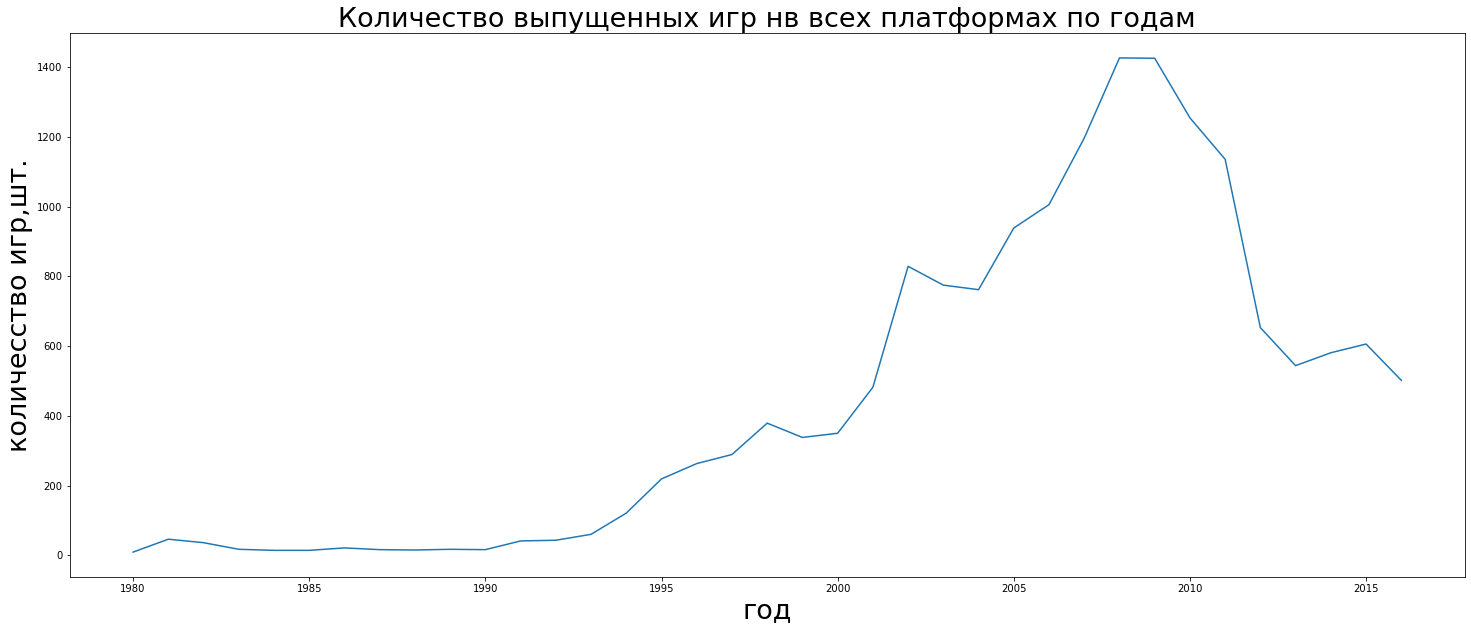

In [13]:
games_per_year = df.groupby(['year_of_release']).agg(games=('genre','count')).reset_index()
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(data=games_per_year, x="year_of_release", y="games")
plt.title('Количество выпущенных игр нв всех платформах по годам', size=27)
plt.xlabel('год', size=27)
plt.ylabel('количесство игр,шт.', size=27)
plt.show()
matplotlib.rcParams.update({'font.size': 21})

**Коммент:   
**Решил проверить как изменялось количество выпускаемых игр по годам. Оказалось, что в период с 2000 по 2010 год был бум роста выпускаемых игрушек.После 2010 идёт спад и возвращение к уровням до 2000 года**

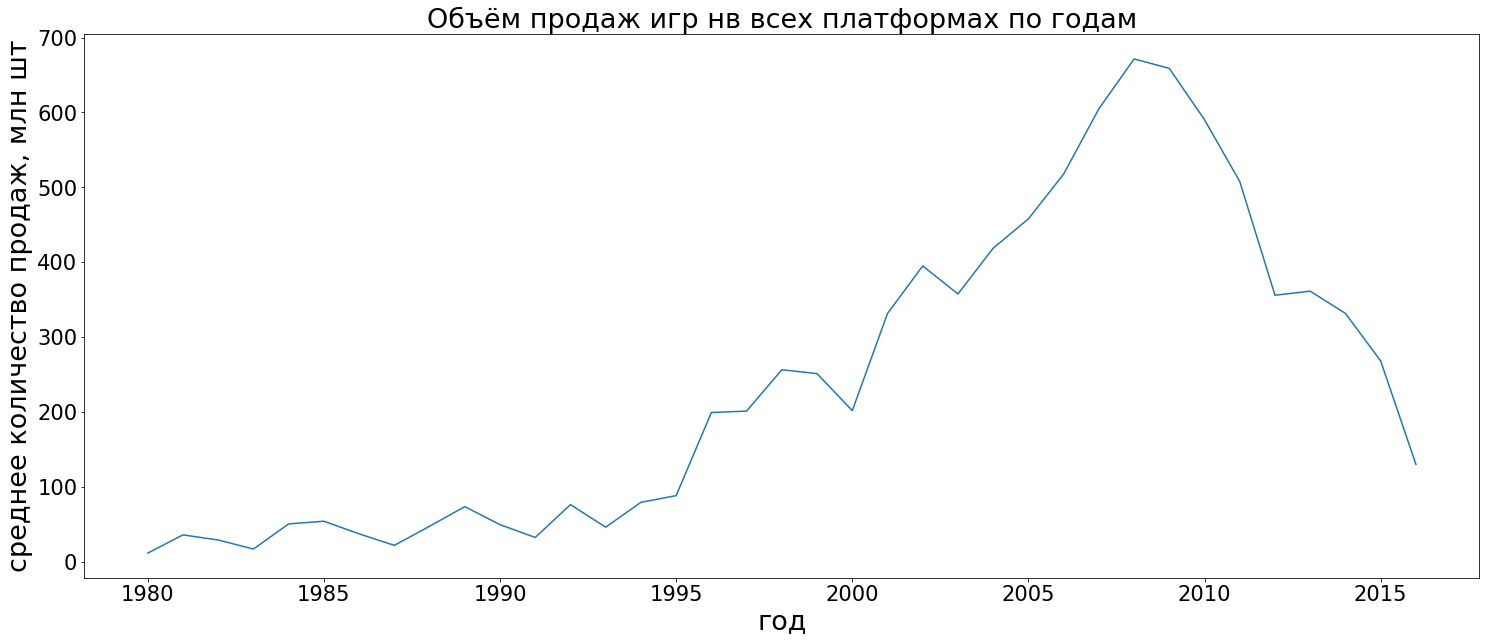

In [14]:
total_sales_per_year = df.groupby(['year_of_release']).agg(sales=('total_sales','sum')).reset_index()
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(data=total_sales_per_year, x="year_of_release", y="sales")
plt.title('Объём продаж игр нв всех платформах по годам', size=27)
plt.xlabel('год', size=27)
plt.ylabel('среднее количество продаж, млн шт', size=27)
plt.show()

**Коммент:   
**Продажи ожидаемо повторяют паттерн количества выпущенных игр**

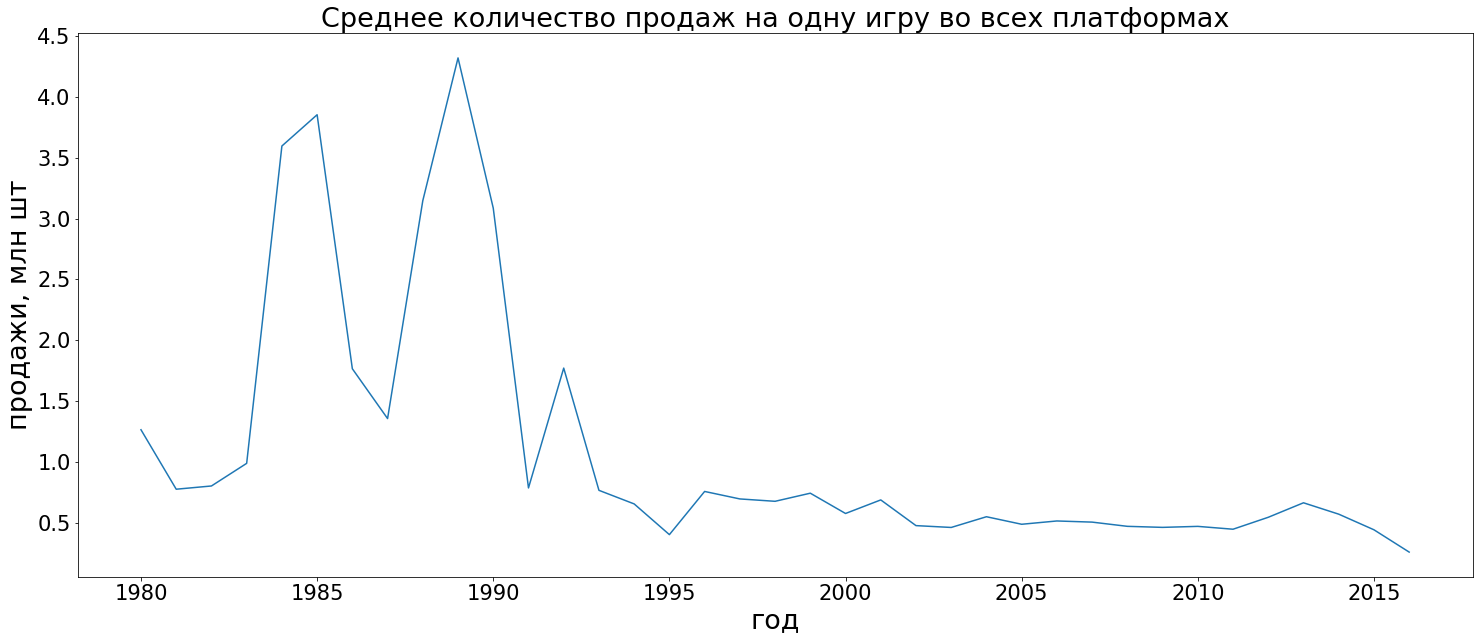

In [15]:
sales_per_game_per_year = df.groupby(['year_of_release']).agg(games=('genre','count'), sales = ('total_sales','sum')).reset_index()
sales_per_game_per_year['sales_per_game'] = sales_per_game_per_year['sales']/sales_per_game_per_year['games'] 
sales_per_game_per_year
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(data=sales_per_game_per_year, x="year_of_release", y="sales_per_game")
plt.title('Среднее количество продаж на одну игру во всех платформах', size=27)
plt.xlabel('год', size=27)
plt.ylabel('продажи, млн шт', size=27)
plt.show()

**Коммент:   
**Как и ожидадалось, до 2000 года малое разнооборазие игр привело к большому количетву продаж на игру. Что касается отрезка после 2000 года, хотя количество выпущенных игр было колосально разным, средняя популярность игры особо не менялась** 

Text(0, 0.5, 'кол-во игр')

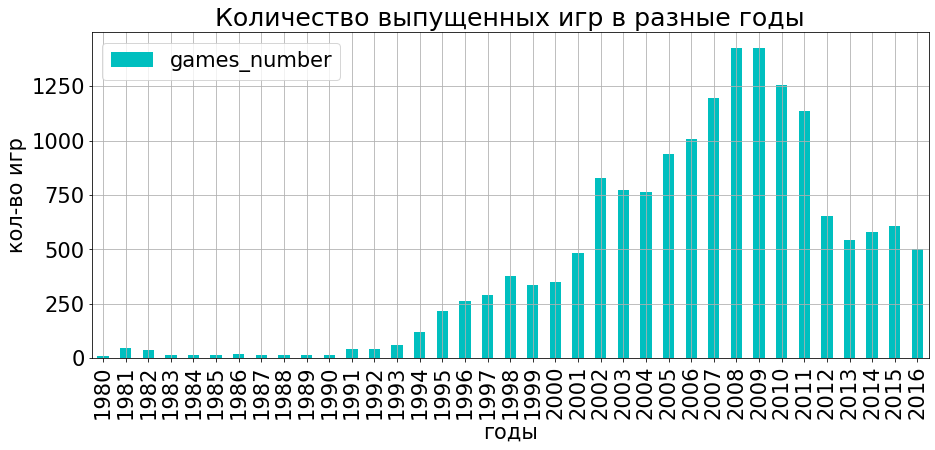

In [16]:
games_per_year = df.groupby('year_of_release').agg(games_number=('name','count'))
games_per_year.plot(kind='bar', grid=True, figsize = (15,6), color='c')
plt.title('Количество выпущенных игр в разные годы')
plt.xlabel('годы')
plt.ylabel('кол-во игр')

**Коммент:   
**Количество игр по годам в другой визуализации.** 

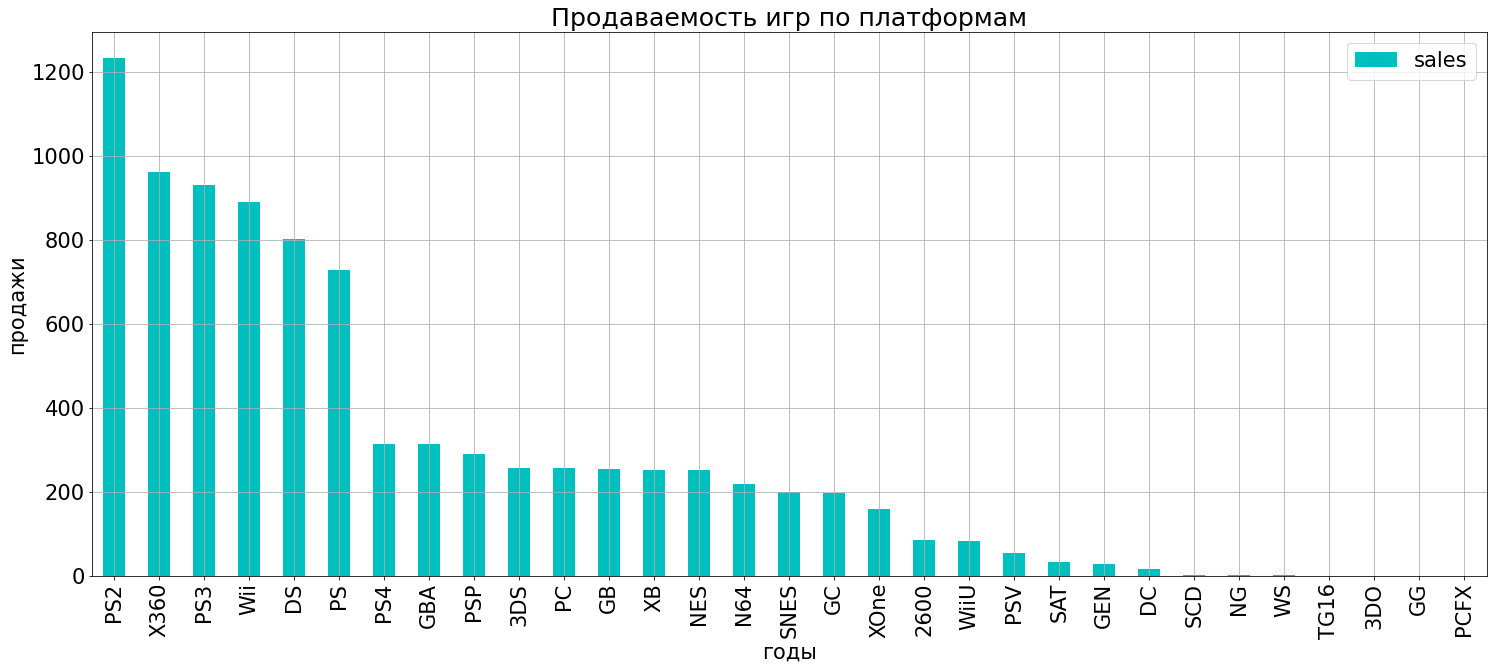

In [17]:
matplotlib.rcParams.update({'font.size': 21})
platforms = df.groupby('platform').agg(sales=('total_sales','sum'))
platforms = platforms.sort_values(by=['sales'], ascending = False)
platforms
platforms.plot(kind='bar', grid=True, figsize = (25,10), color='c')
plt.title('Продаваемость игр по платформам')
plt.xlabel('годы')
plt.ylabel('продажи')
matplotlib.rcParams.update({'font.size': 21})

**Коммент:  
**Из графика видно, что целесообразно взять топ6 платформ для анализа, так как после 6 позиции идёт существенное падение в 2 раза**

In [18]:
top_6_platforms = platforms.head(6).reset_index()
top_6_platforms['platform'].unique()
popular_platforms = df[df.platform.isin(top_6_platforms['platform'].unique())]
popular_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,100.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,100.0,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01


**Коммент:   
**9262 строк принадлежат топ-6 популянрым платформам**

In [19]:
games_per_platform = popular_platforms.groupby(['platform','year_of_release']).agg(games=('genre','count'),sales=('total_sales','sum')).reset_index()
games_per_platform

,platform,year_of_release,games,sales
0,DS,1985,1,0.02
1,DS,2004,23,17.27
2,DS,2005,118,130.14
3,DS,2006,201,119.81
4,DS,2007,376,146.94
...,...,...,...,...
62,X360,2012,106,99.74
63,X360,2013,75,88.58
64,X360,2014,63,34.74
65,X360,2015,35,11.96


**Коммент:   
**Странно, что у платфорсы DS вышла игра в 1985 году, а затем только в 2004. Нужно проверить это, спросив у гугла**

In [20]:
df[(df['platform']=='DS') & (df['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,100.0,NaN,0.02


In [21]:
df.at[15957,'year_of_release']=2010

In [22]:
top_6_platforms = platforms.head(6).reset_index()
top_6_platforms['platform'].unique()
popular_platforms = df[df.platform.isin(top_6_platforms['platform'].unique())]
popular_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,100.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,100.0,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01


**Коммент:   
**Гугл доказал, что данная игра была выпущена в 2010 году, так что заменим эту ячейку таблицы на актуальные данные. Соответсвенно, перевывели таблицу popular_platforms**

In [23]:
life_span_all_platfroms = df.groupby(['platform']).agg(first_year=('year_of_release','min'),last_year=('year_of_release','max')).reset_index()
life_span_all_platfroms['total_years'] = life_span_all_platfroms['last_year'] - life_span_all_platfroms['first_year']
life_span_all_platfroms['total_years'].mean()

7.0

**Коммент:   
**Средний жизненный цикл для всех платформ - 7 лет** 

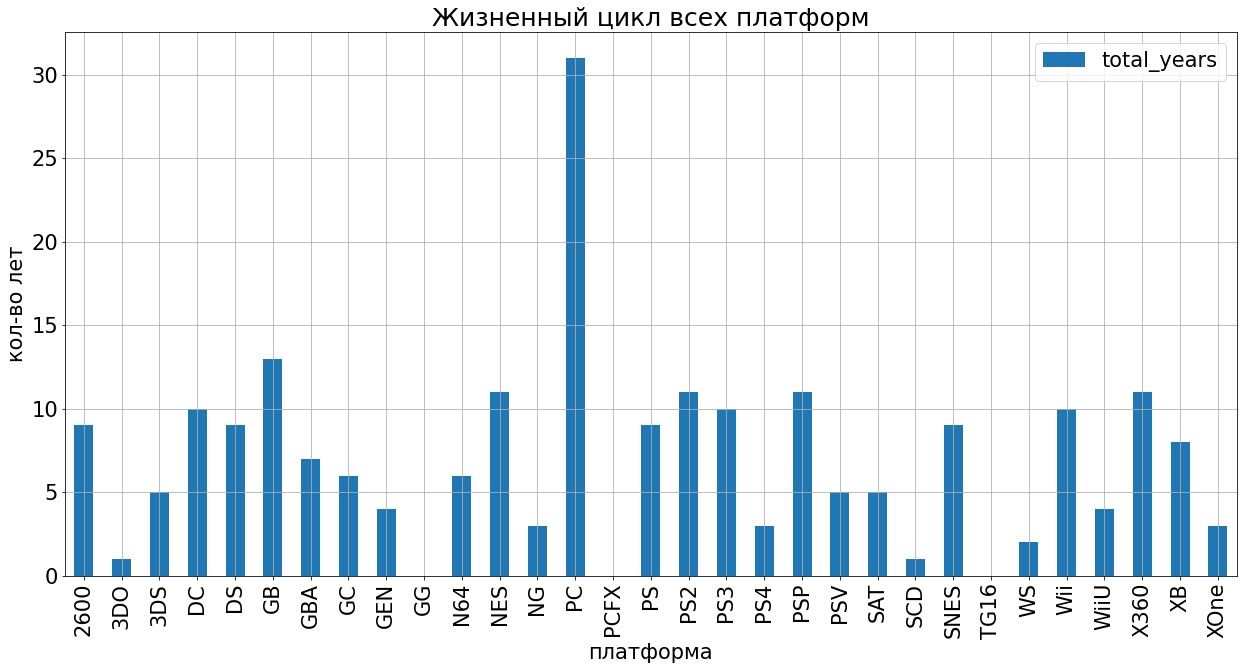

In [24]:
plt.rcParams["figure.figsize"] = (21,10)
life_span_all_platfroms.plot.bar(x="platform", y ="total_years", grid=True)
plt.title('Жизненный цикл всех платформ', size=25)
plt.xlabel('платформа', size=21)
plt.ylabel('кол-во лет', size=21)
plt.show()

**Коммент:  
**График жизненных циклов всех платформ показывает явное выделение PC - 31 год**

In [25]:
life_span_popular_platforms = popular_platforms.groupby(['platform']).agg(first_year=('year_of_release','min'),last_year=('year_of_release','max')).reset_index()

In [26]:
life_span_popular_platforms ['total_years'] = life_span_popular_platforms ['last_year'] - life_span_popular_platforms ['first_year']
life_span_popular_platforms 

,platform,first_year,last_year,total_years
0,DS,2004,2013,9
1,PS,1994,2003,9
2,PS2,2000,2011,11
3,PS3,2006,2016,10
4,Wii,2006,2016,10
5,X360,2005,2016,11


In [27]:
life_span_popular_platforms['total_years'].mean()

10.0

**Коммент:  
**Средний жизненный цикл топ-6 популярных платформ - 10 лет**

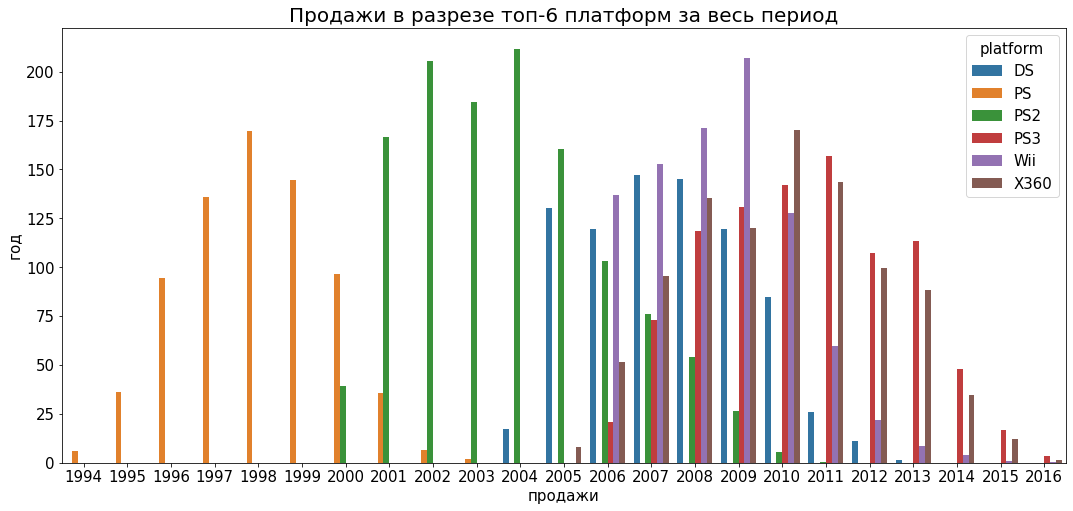

In [28]:
matplotlib.rcParams.update({'font.size': 15})
top6_by_year = popular_platforms.groupby(['platform','year_of_release']).agg(sales=('total_sales','sum')).reset_index() 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="year_of_release", y="sales", hue = 'platform',data=top6_by_year)
matplotlib.rcParams.update({'font.size': 10})
plt.title('Продажи в разрезе топ-6 платформ за весь период', size=20)
plt.xlabel('продажи', size=15)
plt.ylabel('год', size=15)
plt.show()


**Коммент:   
**Мы видим что, когда выходит новая PS, предыдущая исчезает в течении 4-5 лет. При чем новая PS выходит раз в 6 лет. DS, Wii и X360 развивались с одинаковой моделью, с временным лагом в 2-3 года.**

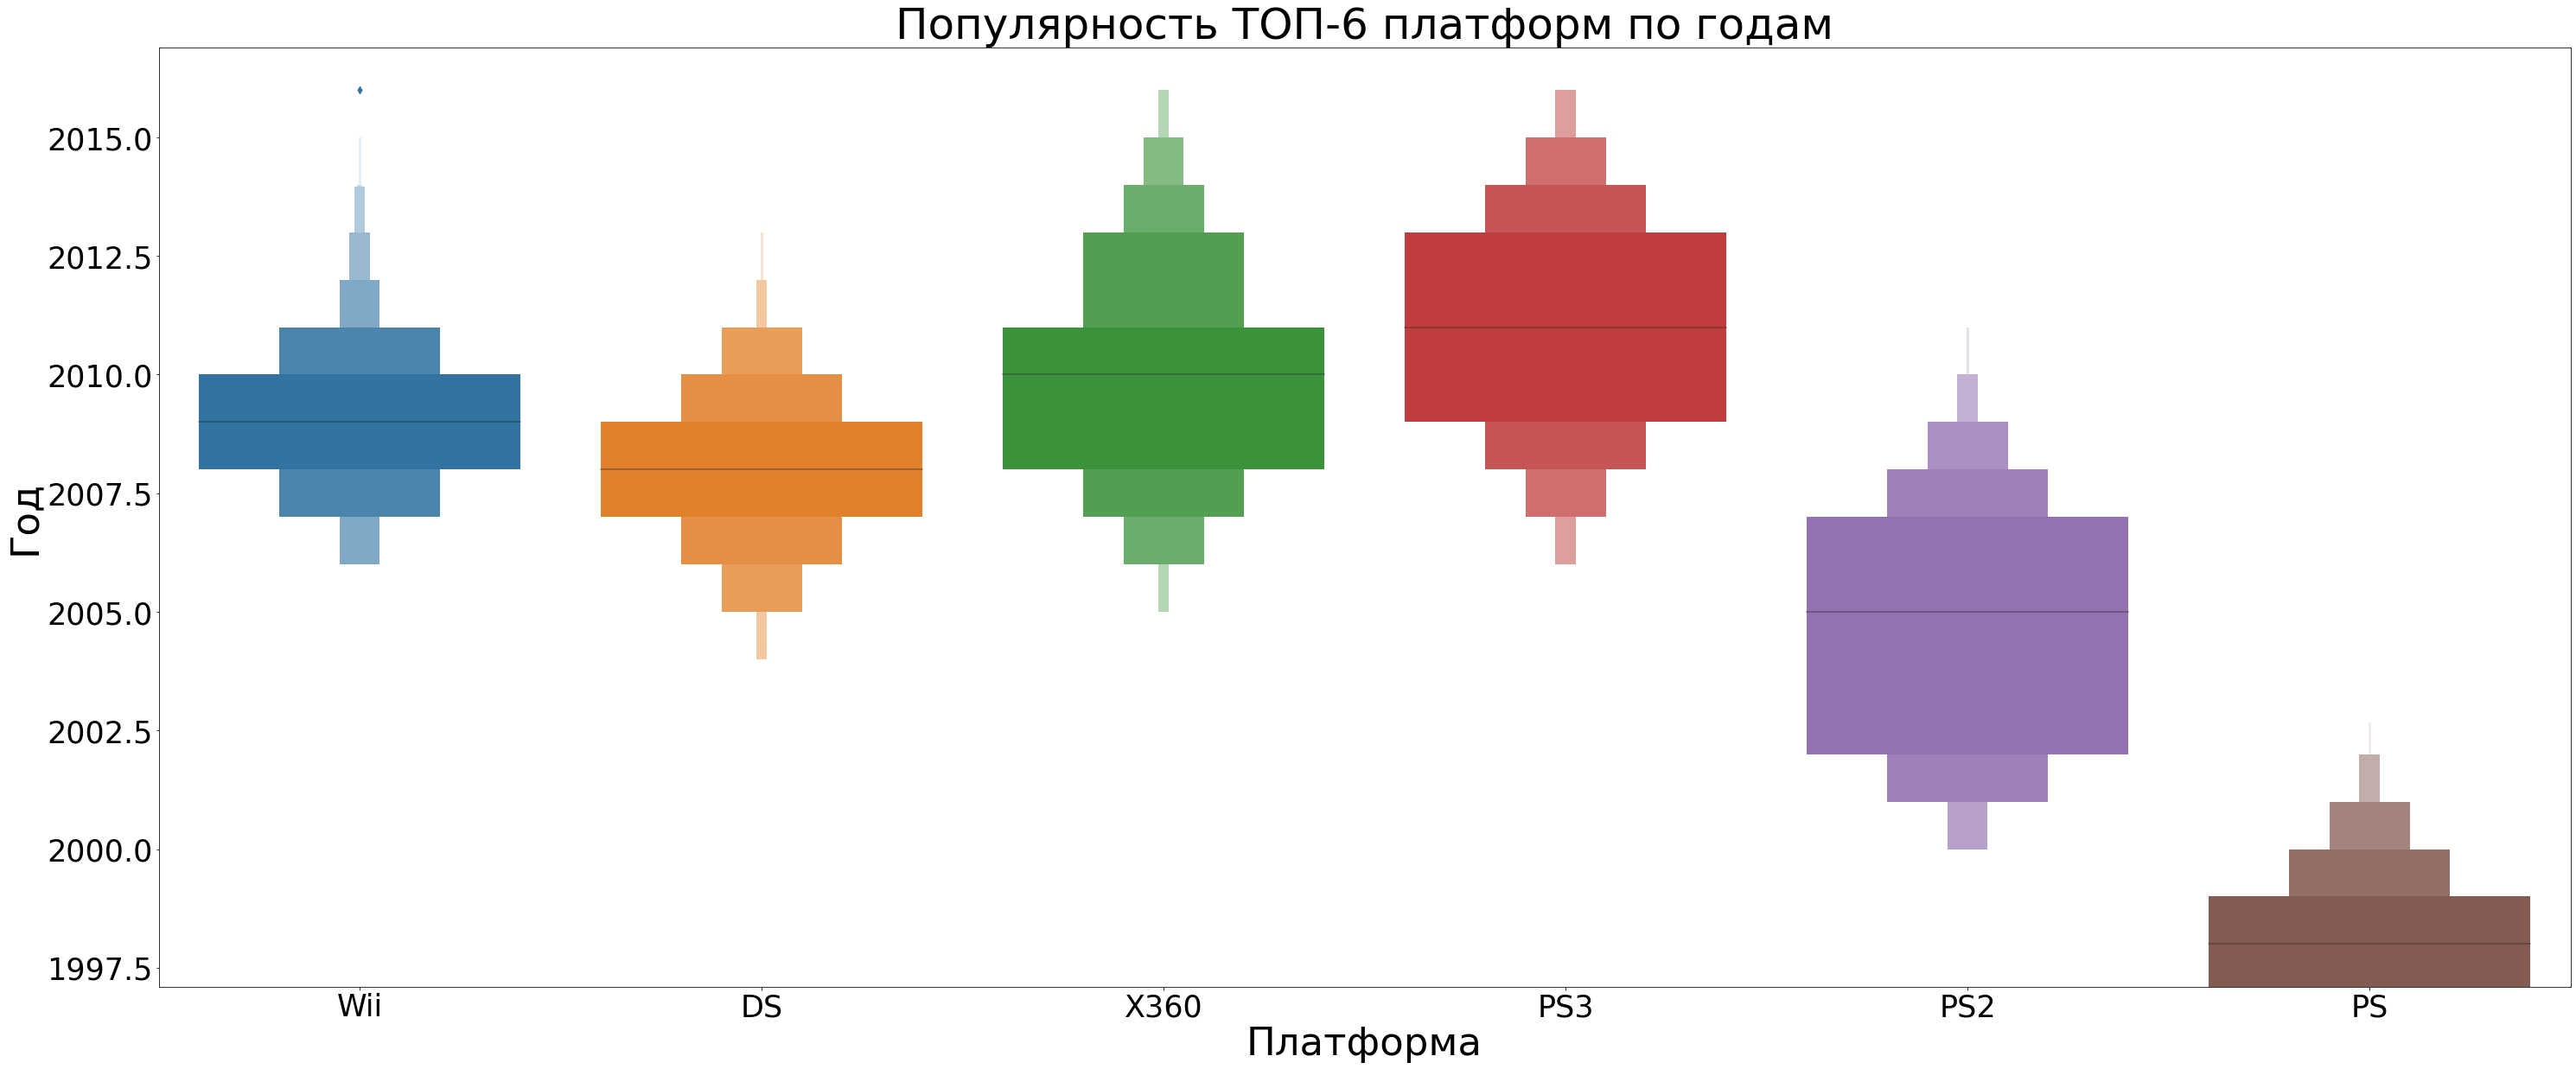

In [29]:
matplotlib.rcParams.update({'font.size': 35})
import matplotlib
plt.figure(figsize=(50,20))
sns.boxenplot(x=popular_platforms['platform'], y=popular_platforms['year_of_release'])
plt.title('Популярность ТОП-6 платформ по годам', size=50)
plt.xlabel('Платформа', size=45)
plt.ylabel('Год', size=45)
plt.show()

**Коммент:  
**Более наглядный график, отражающий жизненные циклы**

In [30]:
df_actual_period = df[df['year_of_release']>2011]
df_actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,100.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,100.0,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01


**Коммент:  
**На основании всех предыдущих результатов, актуальный период решено взять с 2012 года включительно**

In [31]:
platforms_actual_period = df_actual_period.groupby('platform').agg(sales=('total_sales','sum'))
platforms_actual_period = platforms_actual_period.sort_values(by=['sales'], ascending = False)
top_10_platforms_actual_period = platforms_actual_period.head(10).reset_index()
top_10_platforms_actual_period['platform'].unique()
top_10_platforms_actual_period

,platform,sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


**Коммент:   
**В актульном периоде возьмём 10 самых популярных платформ актуального периода для разнообразия**

In [32]:
popular_platfroms_actual_period  = df_actual_period[df_actual_period.platform.isin(top_10_platforms_actual_period['platform'].unique())]
popular_platfroms_actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,100.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,100.0,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,100.0,NaN,0.01


**Коммент:  
**Отфильтруем таблицу с 2012 года оставив только 10 топовых платформ периода**

In [33]:
top10_by_year_actual_period = popular_platfroms_actual_period.groupby(['platform','year_of_release']).agg(sales=('total_sales','sum')).reset_index()
top10_by_year_actual_period

,platform,year_of_release,sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


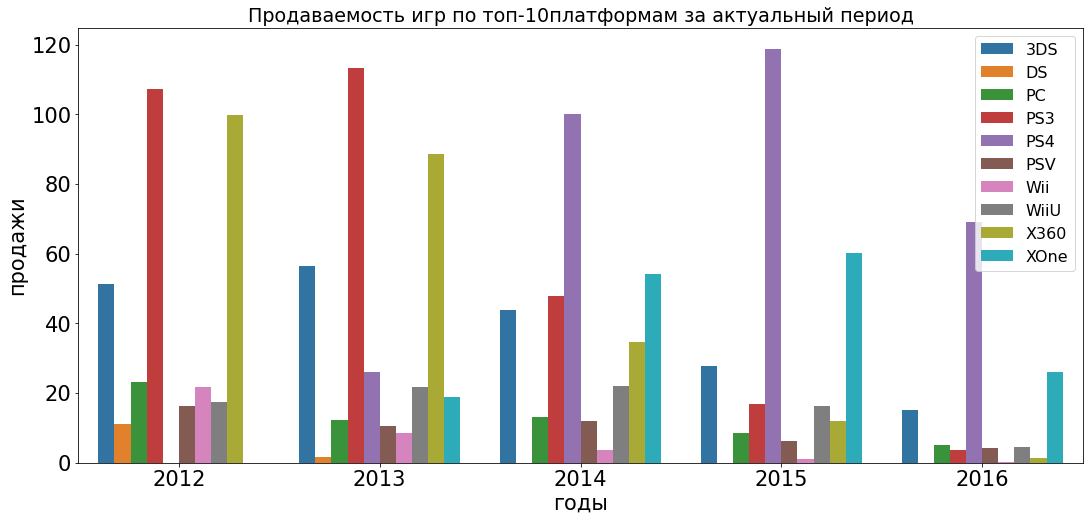

In [34]:
matplotlib.rcParams.update({'font.size': 21})
top10_by_year_actual_period = popular_platfroms_actual_period.groupby(['platform','year_of_release']).agg(sales=('total_sales','sum')).reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="year_of_release", y="sales", hue = 'platform',data=top10_by_year_actual_period)
matplotlib.rcParams.update({'font.size': 16})
plt.legend(loc='upper right')
plt.title('Продаваемость игр по топ-10платформам за актуальный период')
plt.xlabel('годы')
plt.ylabel('продажи')
plt.show()

**Коммент:  
**Как видим в 2016 году продажи в целом упали. Более наглядно увидим их на следующем графике**

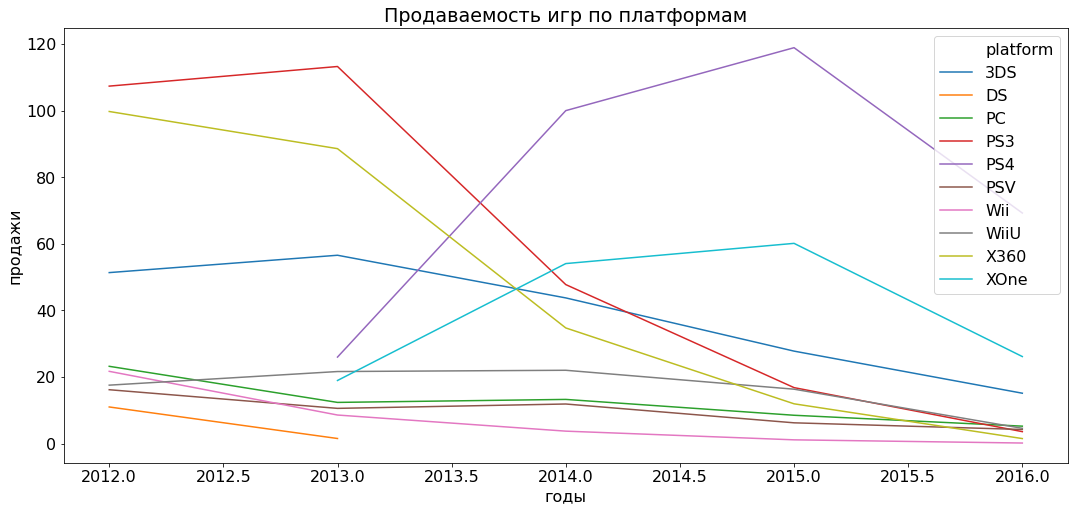

In [35]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(data=top10_by_year_actual_period, x="year_of_release", y="sales", hue="platform")
plt.title('Продаваемость игр по платформам')
plt.xlabel('годы')
plt.ylabel('продажи')
plt.show()

**Коммент:  
**Видно, что PS4 и Хone с 2013 по 2015 смогли сломать общий тренд к падению, тем самым, выделившись среди всех платформ**

In [36]:
top10_by_year_actual_period

,platform,year_of_release,sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14
5,DS,2012,11.01
6,DS,2013,1.54
7,PC,2012,23.22
8,PC,2013,12.38
9,PC,2014,13.28


#### Популярность ТОП-10 платформ по годам за актуальный период

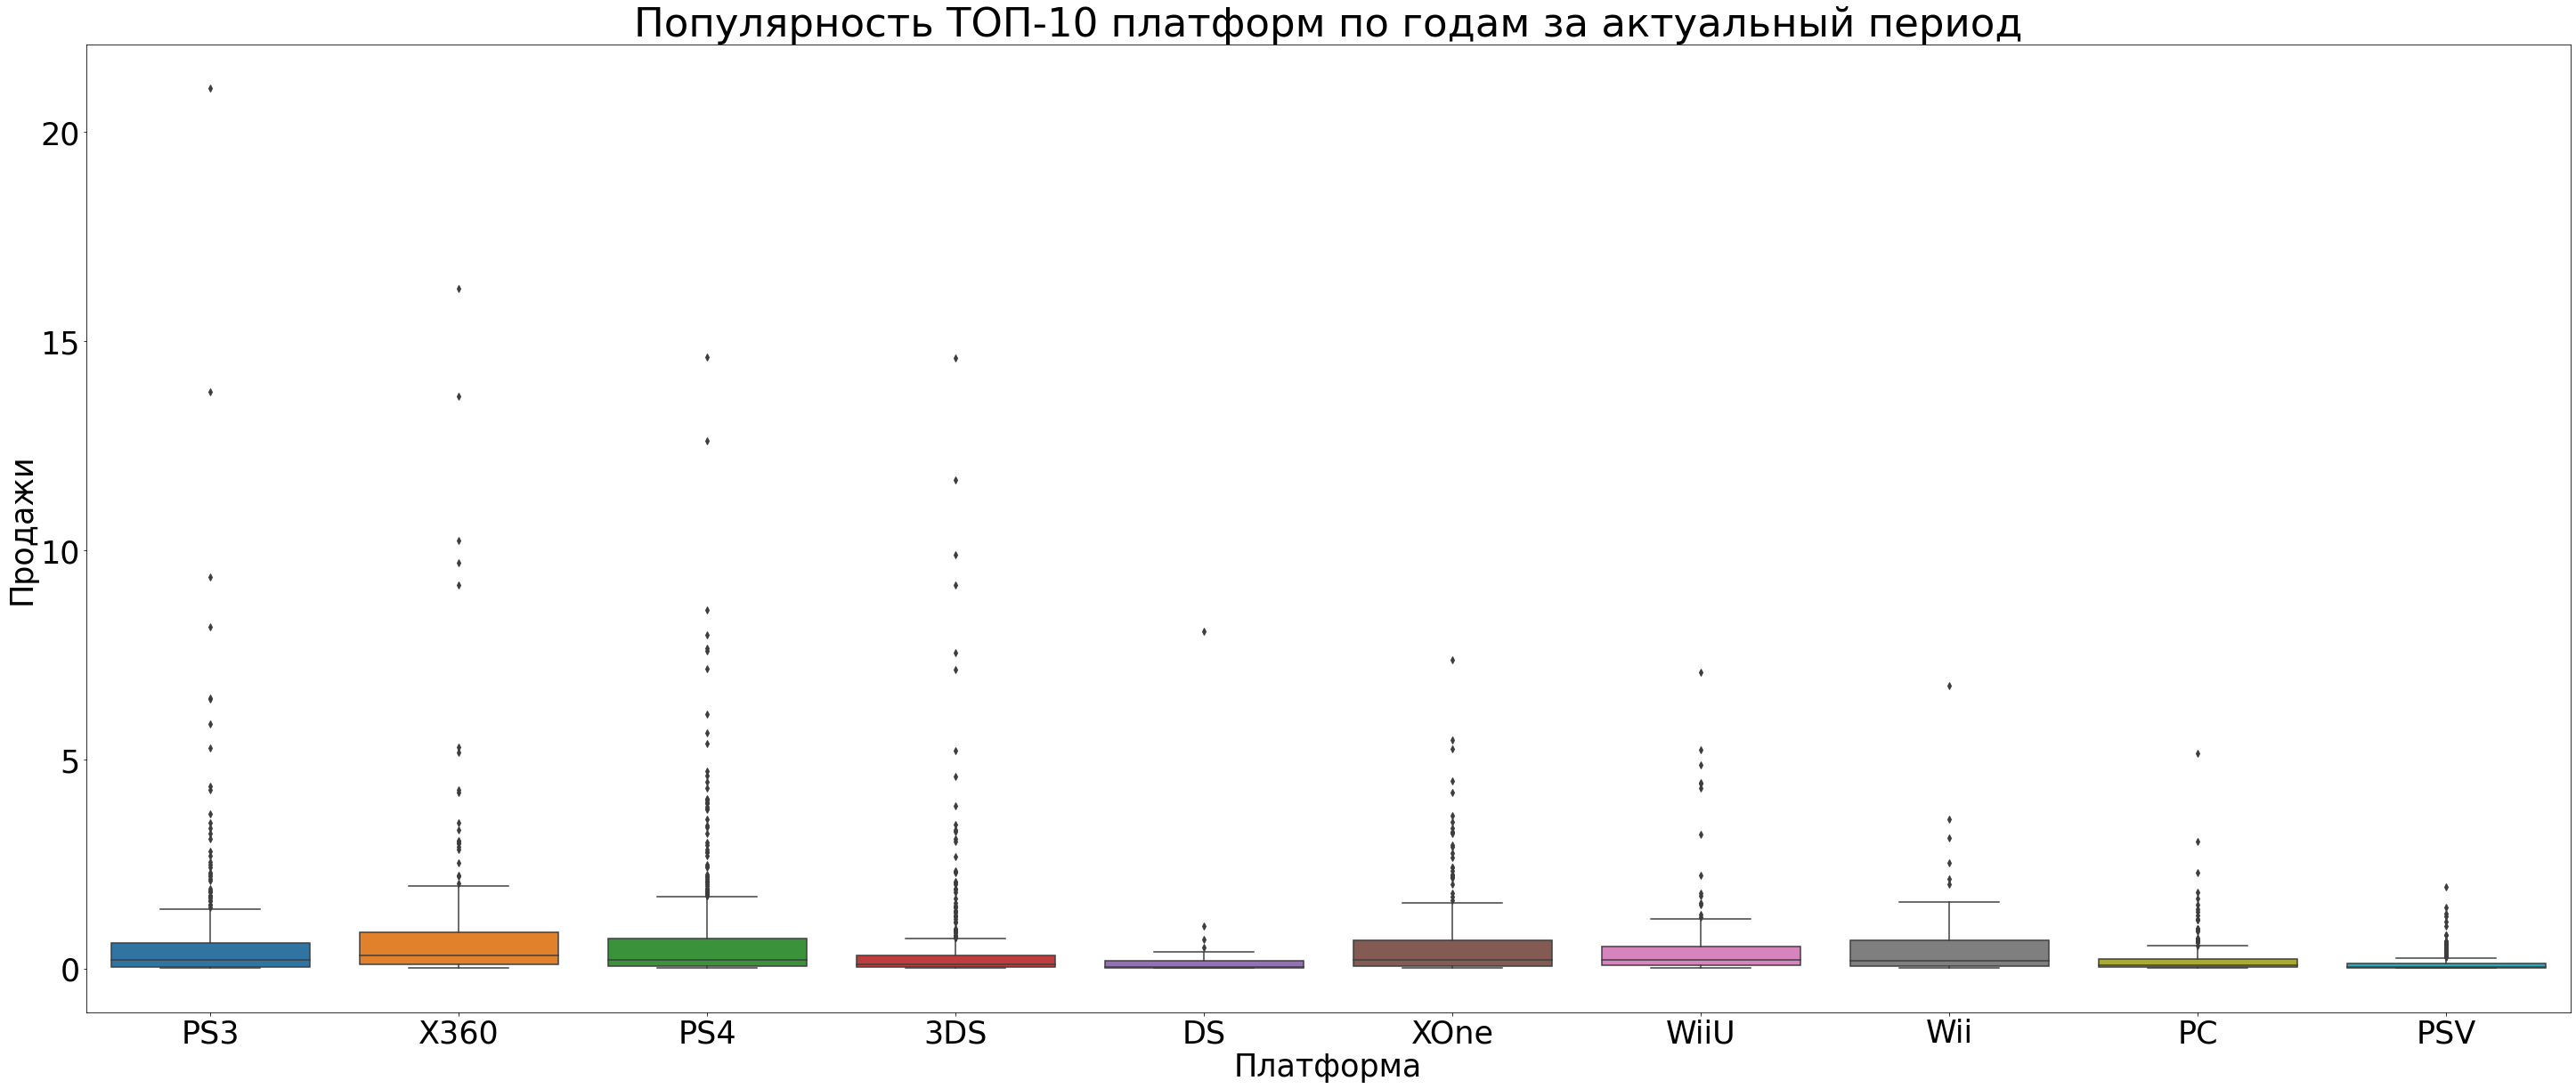

In [37]:
matplotlib.rcParams.update({'font.size': 35})
plt.figure(figsize=(50,20))
sns.boxplot(data=popular_platfroms_actual_period, y='total_sales', x='platform')
plt.title('Популярность ТОП-10 платформ по годам за актуальный период', size=45)
plt.xlabel('Платформа', size=35)
plt.ylabel('Продажи', size=35)
plt.show()

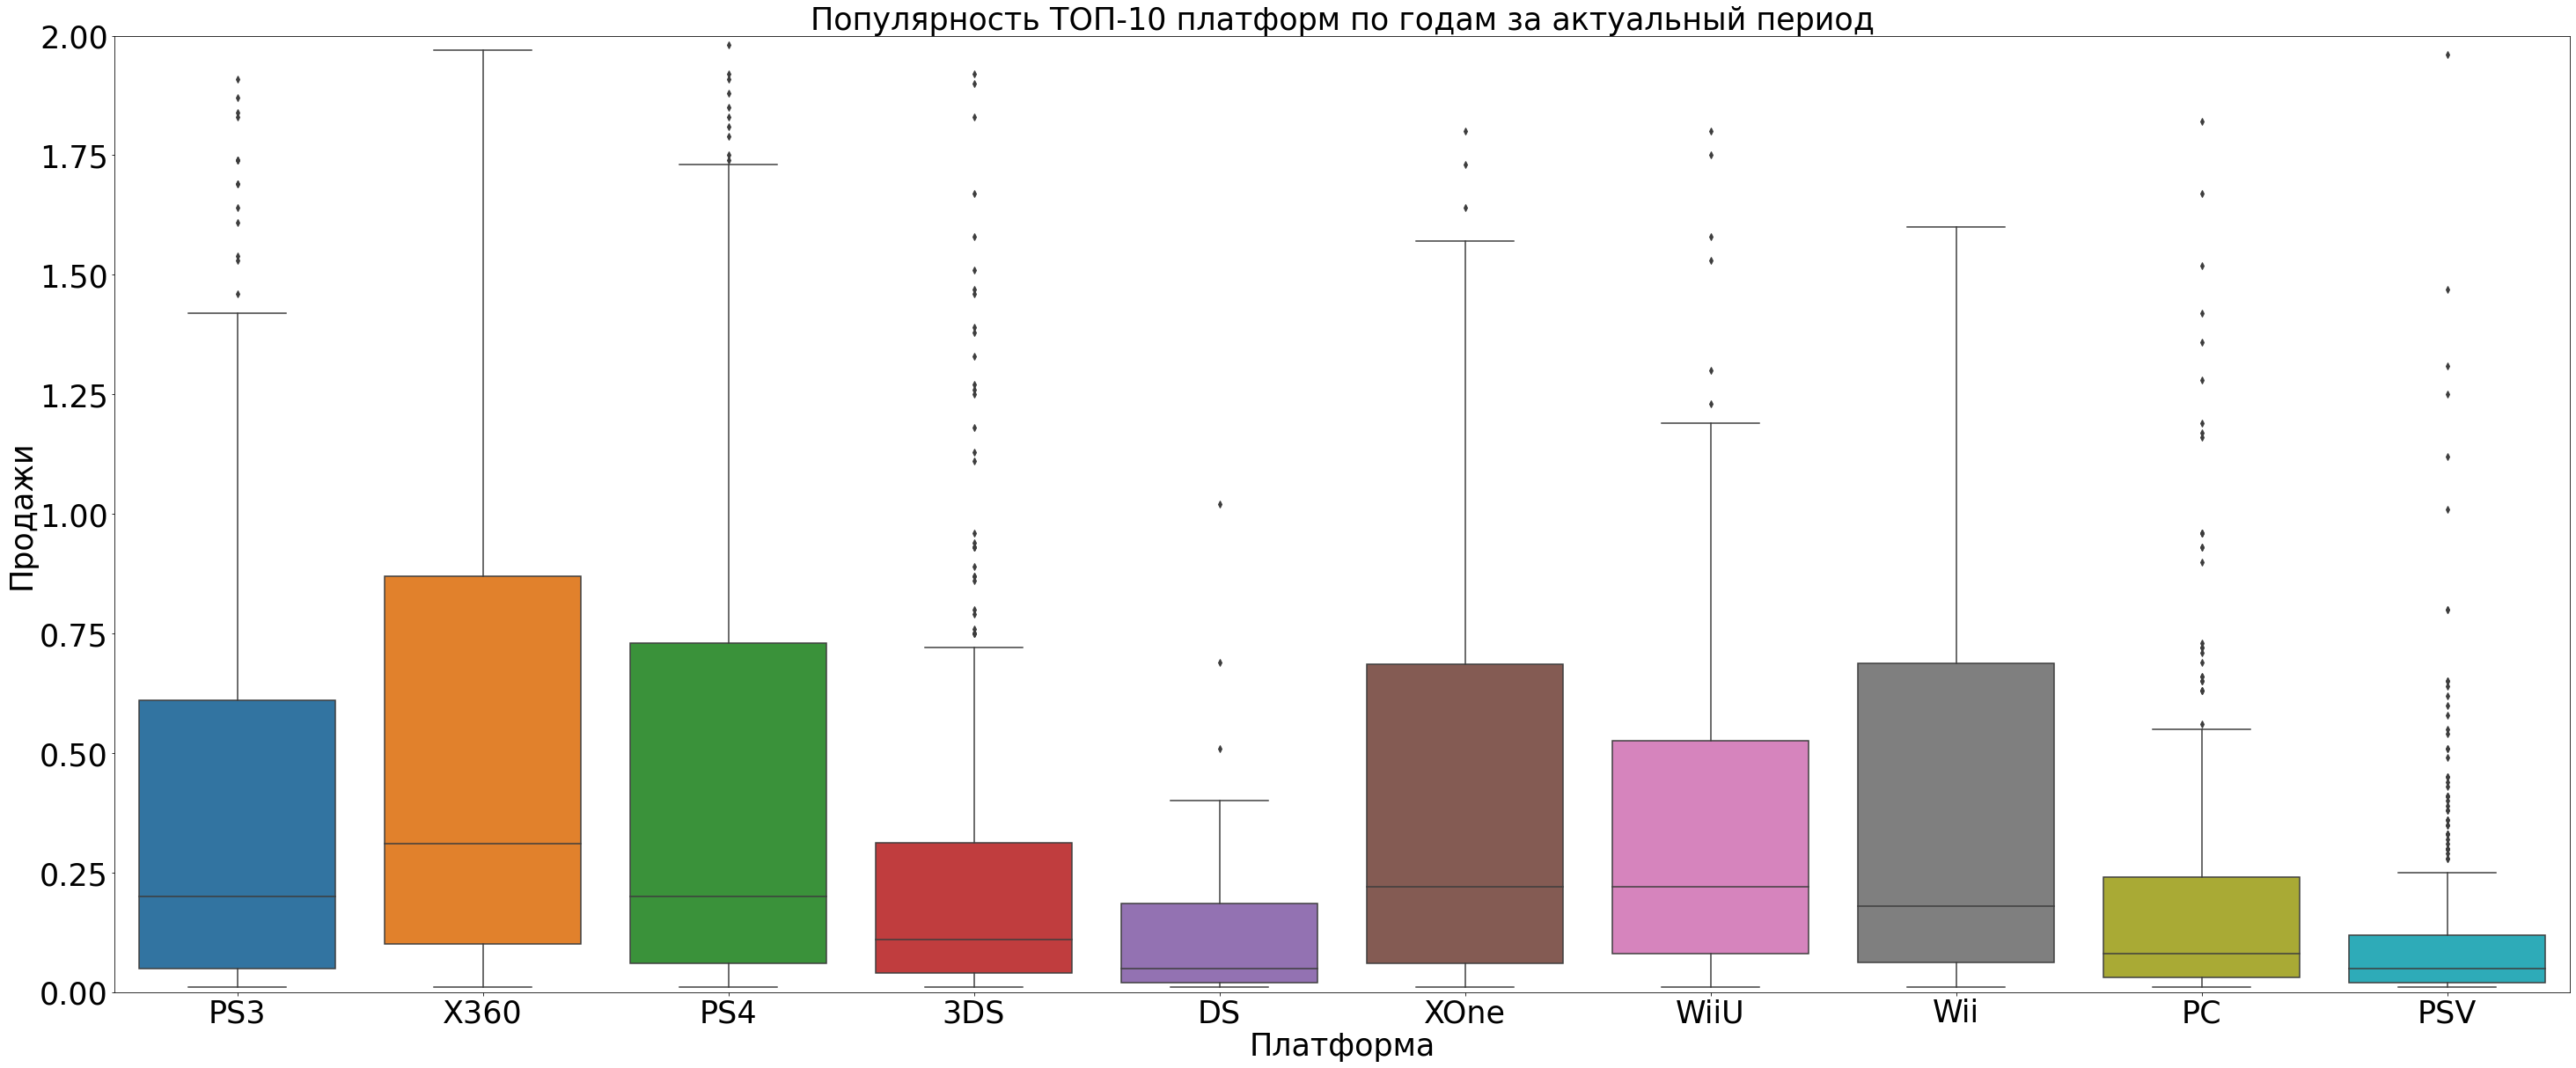

In [38]:
matplotlib.rcParams.update({'font.size': 35})
plt.figure(figsize=(50,20))
sns.boxplot(data=popular_platfroms_actual_period, y='total_sales', x='platform').set(ylim=(0,2))
plt.title('Популярность ТОП-10 платформ по годам за актуальный период', size=35)
plt.xlabel('Платформа', size=35)
plt.ylabel('Продажи', size=35)
plt.show()


**Коммент:  
**Самое высокое медианное значание продаж а так же размах за актуальный период у X360. У платформ 3DS, PS3 и PS4 очень много выбросов**

PS3


,critic_score,total_sales
critic_score,1.000000,0.331497
total_sales,0.331497,1.000000


,user_score,total_sales
user_score,1.000000,-0.005144
total_sales,-0.005144,1.000000


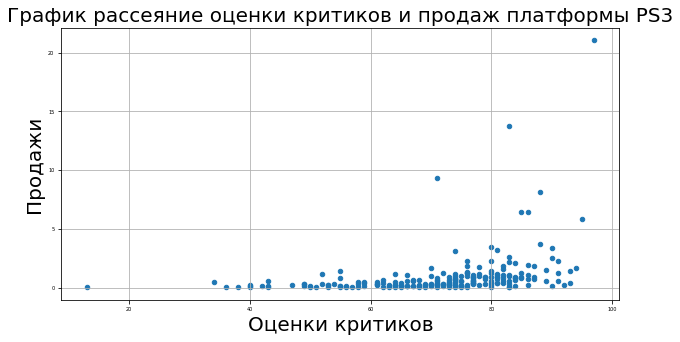

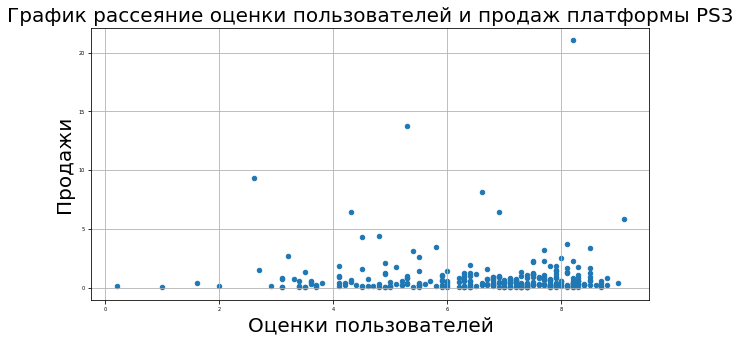

X360


,critic_score,total_sales
critic_score,1.000000,0.360573
total_sales,0.360573,1.000000


,user_score,total_sales
user_score,1.000000,0.006164
total_sales,0.006164,1.000000


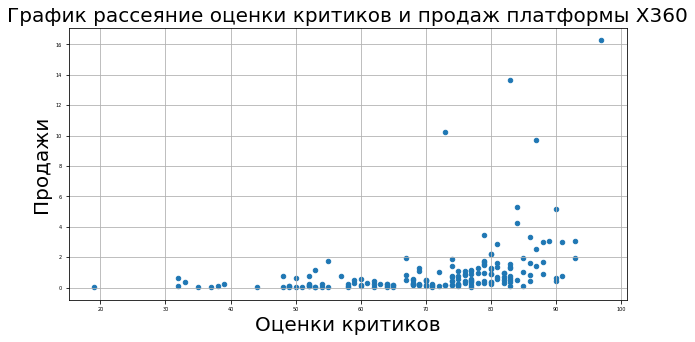

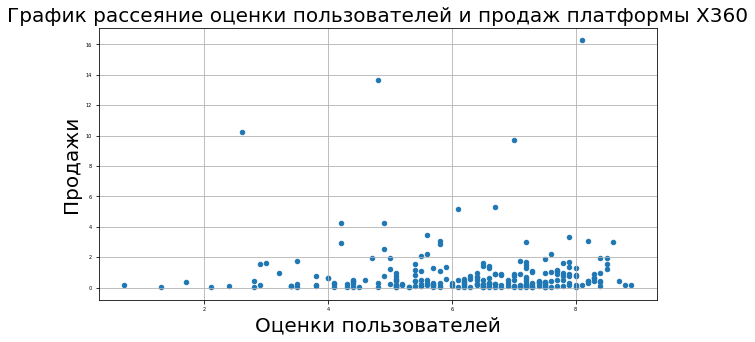

PS4


,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


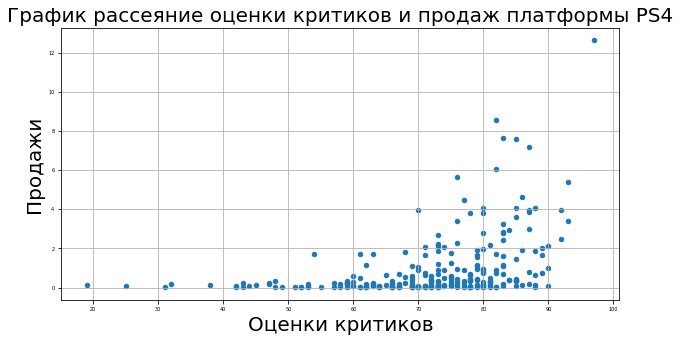

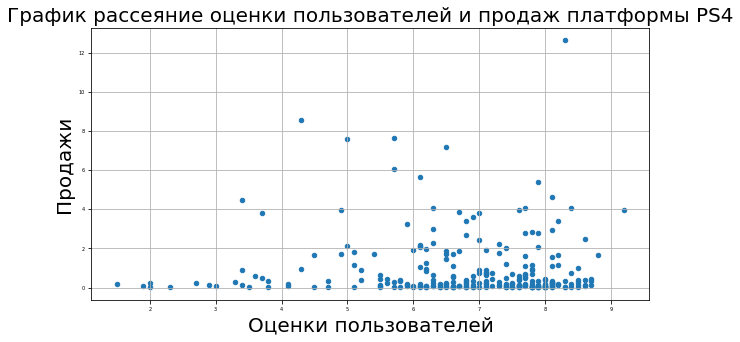

3DS


,critic_score,total_sales
critic_score,1.000000,0.320803
total_sales,0.320803,1.000000


,user_score,total_sales
user_score,1.000000,0.197583
total_sales,0.197583,1.000000


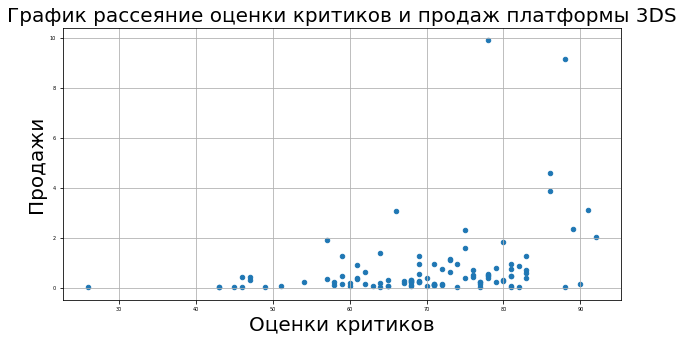

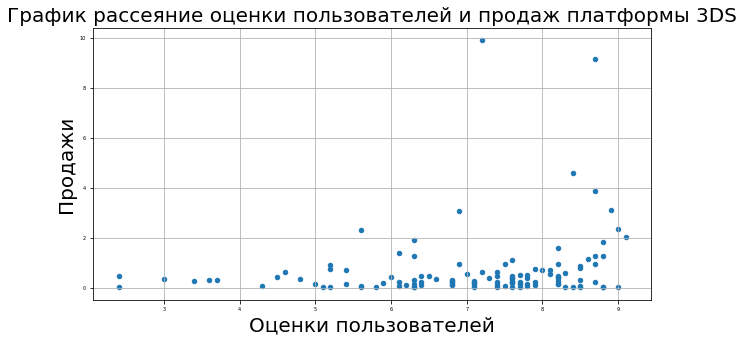

DS


,critic_score,total_sales
critic_score,NaN,NaN
total_sales,NaN,1.0


,user_score,total_sales
user_score,1.000000,0.882709
total_sales,0.882709,1.000000


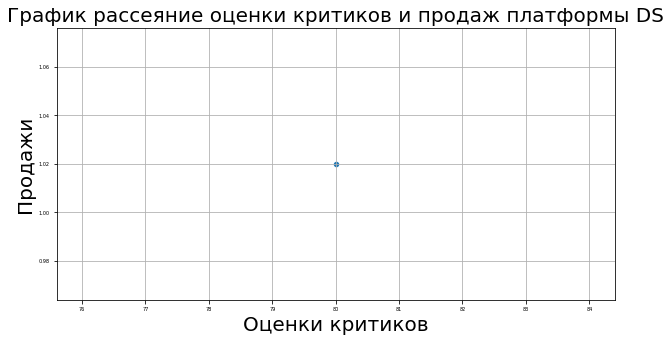

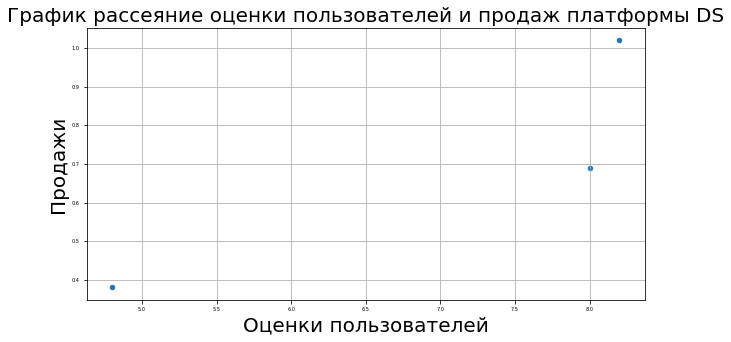

XOne


,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


,user_score,total_sales
user_score,1.000000,-0.068925
total_sales,-0.068925,1.000000


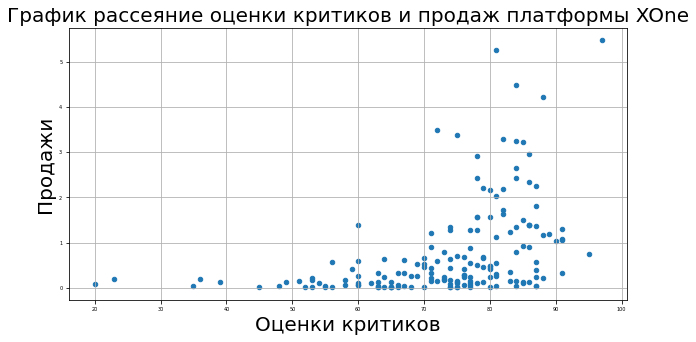

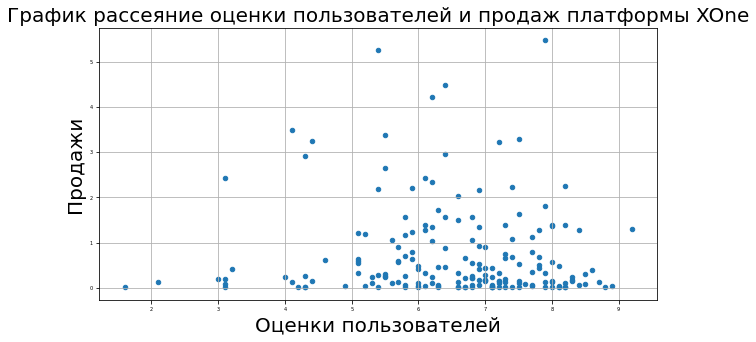

WiiU


,critic_score,total_sales
critic_score,1.00000,0.34838
total_sales,0.34838,1.00000


,user_score,total_sales
user_score,1.000000,0.400219
total_sales,0.400219,1.000000


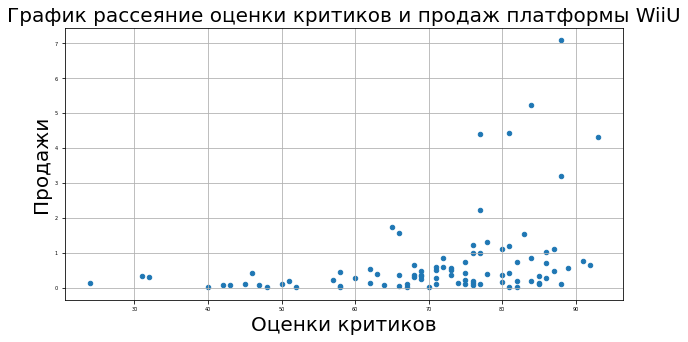

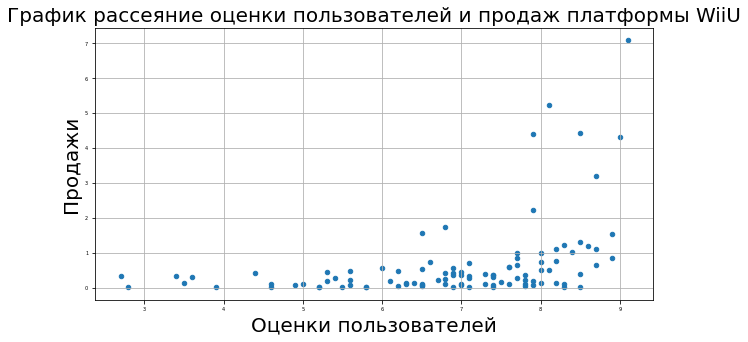

Wii


,critic_score,total_sales
critic_score,1.000000,-0.424341
total_sales,-0.424341,1.000000


,user_score,total_sales
user_score,1.000000,0.296197
total_sales,0.296197,1.000000


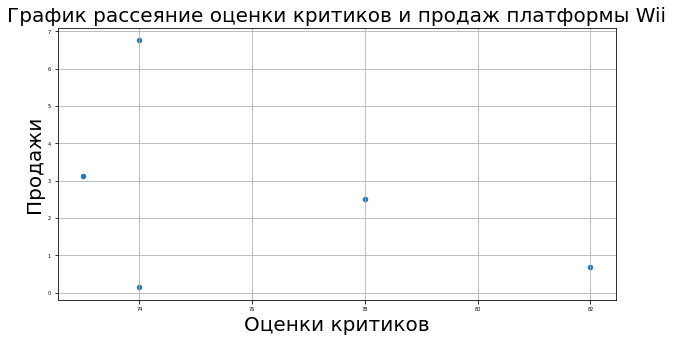

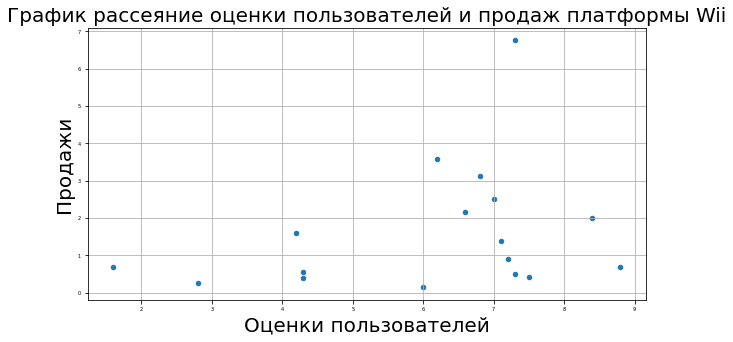

PC


,critic_score,total_sales
critic_score,1.000000,0.237243
total_sales,0.237243,1.000000


,user_score,total_sales
user_score,1.000000,-0.121867
total_sales,-0.121867,1.000000


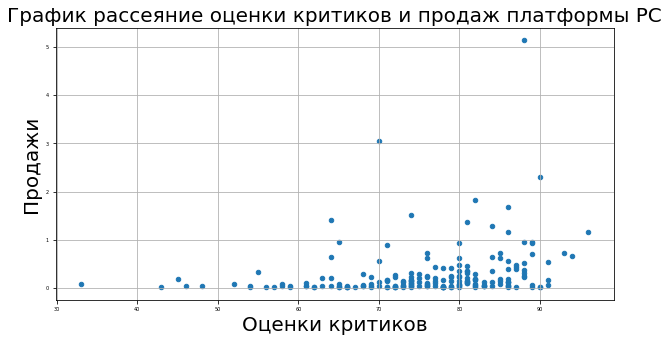

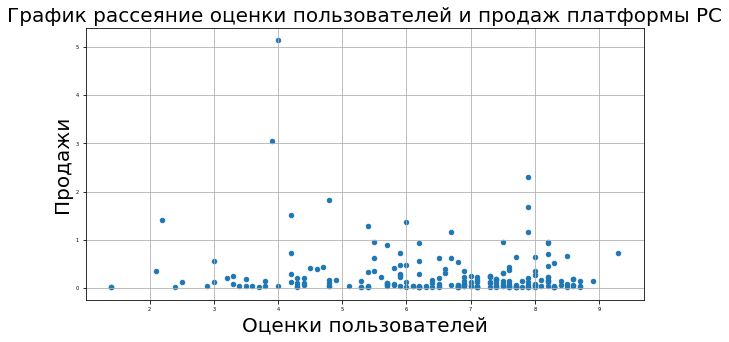

PSV


,critic_score,total_sales
critic_score,1.000000,0.094488
total_sales,0.094488,1.000000


,user_score,total_sales
user_score,1.000000,-0.004339
total_sales,-0.004339,1.000000


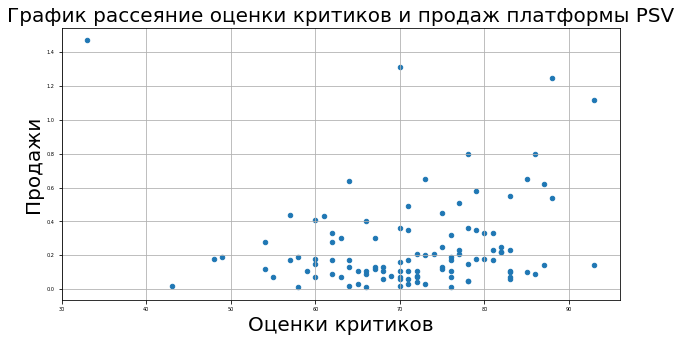

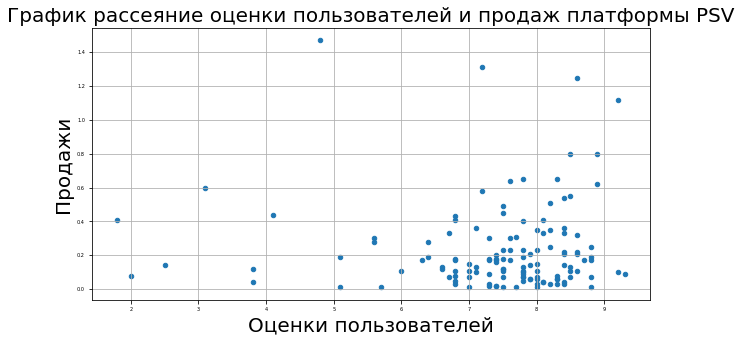

In [39]:
matplotlib.rcParams.update({'font.size': 5})
for i in popular_platfroms_actual_period['platform'].unique():
    print(i)
    display(popular_platfroms_actual_period[popular_platfroms_actual_period['platform']==i][['critic_score','total_sales']].corr())
    display(popular_platfroms_actual_period[(popular_platfroms_actual_period['platform']==i) & (popular_platfroms_actual_period['user_score']<11)][['user_score','total_sales']].corr())
    
    popular_platfroms_actual_period[popular_platfroms_actual_period['platform']==i].plot(figsize=(10,5),x='critic_score', y='total_sales', kind='scatter', grid=True)
    plt.title('График рассеяние оценки критиков и продаж платформы'+' '+i,size=20)
    plt.xlabel('Оценки критиков',size=20)
    plt.ylabel('Продажи',size=20)
    
    
    popular_platfroms_actual_period[(popular_platfroms_actual_period['platform']==i) & (popular_platfroms_actual_period['user_score']<11)].plot(figsize=(10,5),x='user_score', y='total_sales', kind='scatter', grid=True)
    plt.title('График рассеяние оценки пользователей и продаж платформы'+' '+i,size=20)
    plt.xlabel('Оценки пользователей',size=20)
    plt.ylabel('Продажи',size=20)
    
    # Комментарий ревьюера 2
    ''' 👇 Если цикл заканчивать кодом ниже, то в цикле выводятся таблицы 
    и графики по каждой платформе в одном месте, а не как было все таблицы сверху, графики снизу.'''
    plt.show()  # код ревьюера

**Коммент:   
**Выводы: 1) В целом, оценка критиков более сильный фактор продаж, чем оценка пользователей, хотя и там и там она слабая либо очень слабая. Хотя есть исключение(WiiU). Но всё же, оценка пользователей слабо коррелириует с продажи, а в некоторых случаях (Xone,PC и PS4) корреляция даже отрицательна. Графики наглядно это демонстрируют**

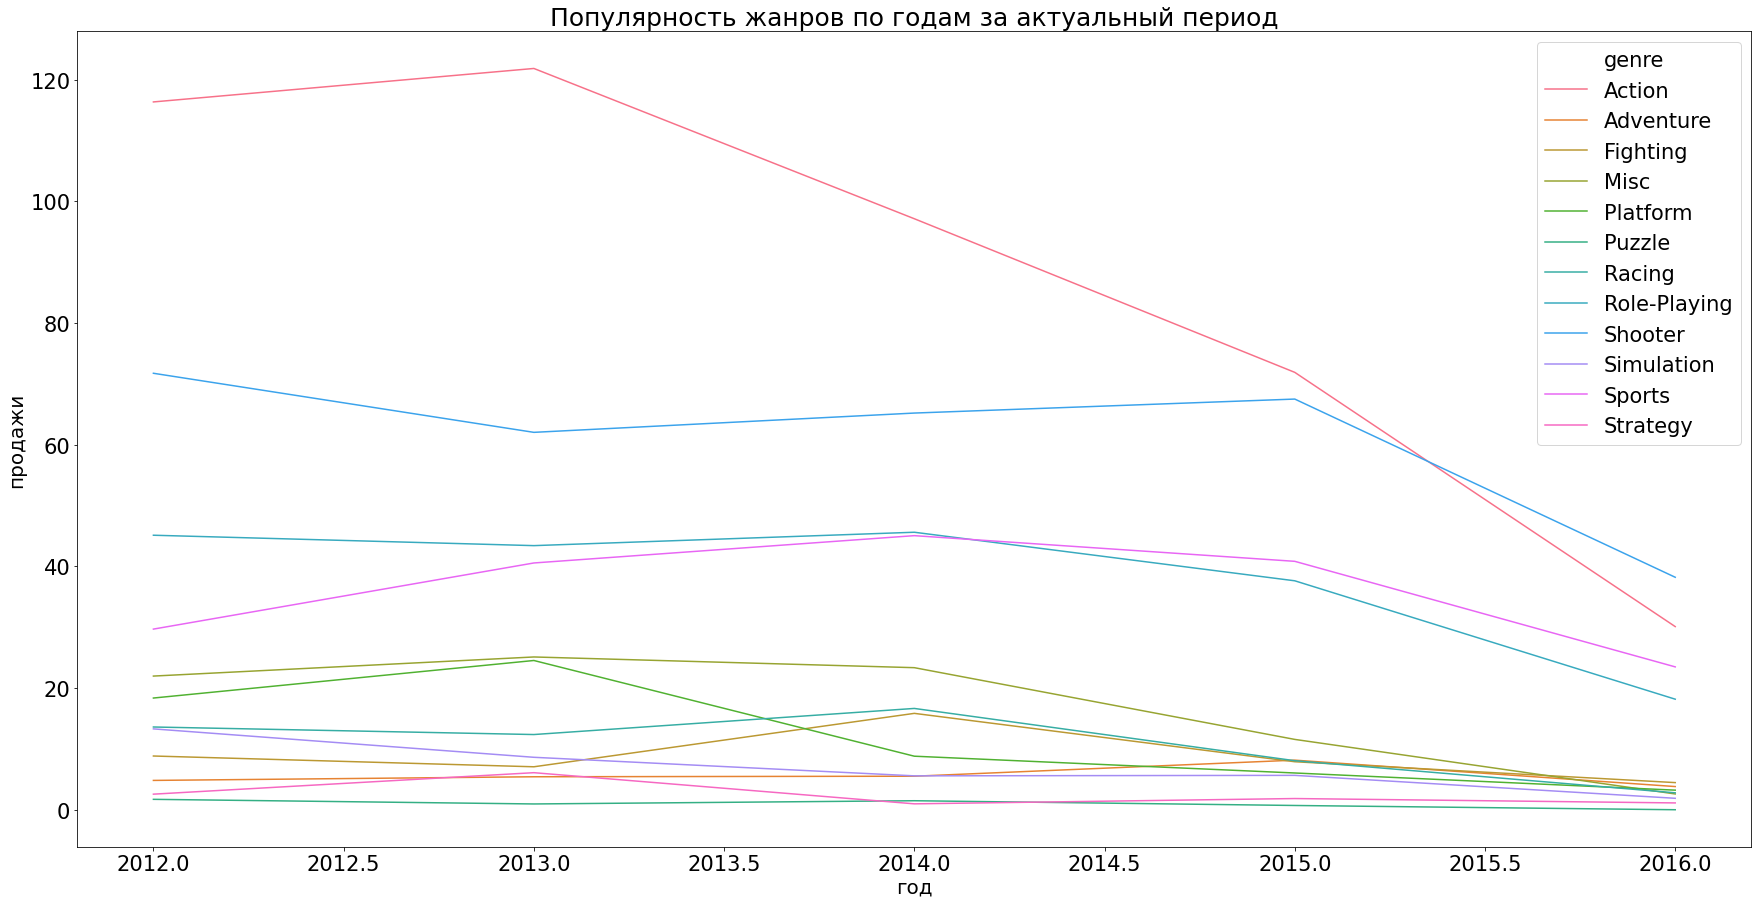

In [40]:
matplotlib.rcParams.update({'font.size': 21})
genres_per_year = popular_platfroms_actual_period.groupby(['genre','year_of_release']).agg(sales = ('total_sales','sum')).reset_index()
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(data=genres_per_year, x="year_of_release", y="sales", hue="genre")
matplotlib.rcParams.update({'font.size': 25})
plt.title('Популярность жанров по годам за актуальный период', size=25)
plt.xlabel('год', size=20)
plt.ylabel('продажи', size=20)
plt.show()

#### Самые популярные жанры - 'Action' и 'Shooter'

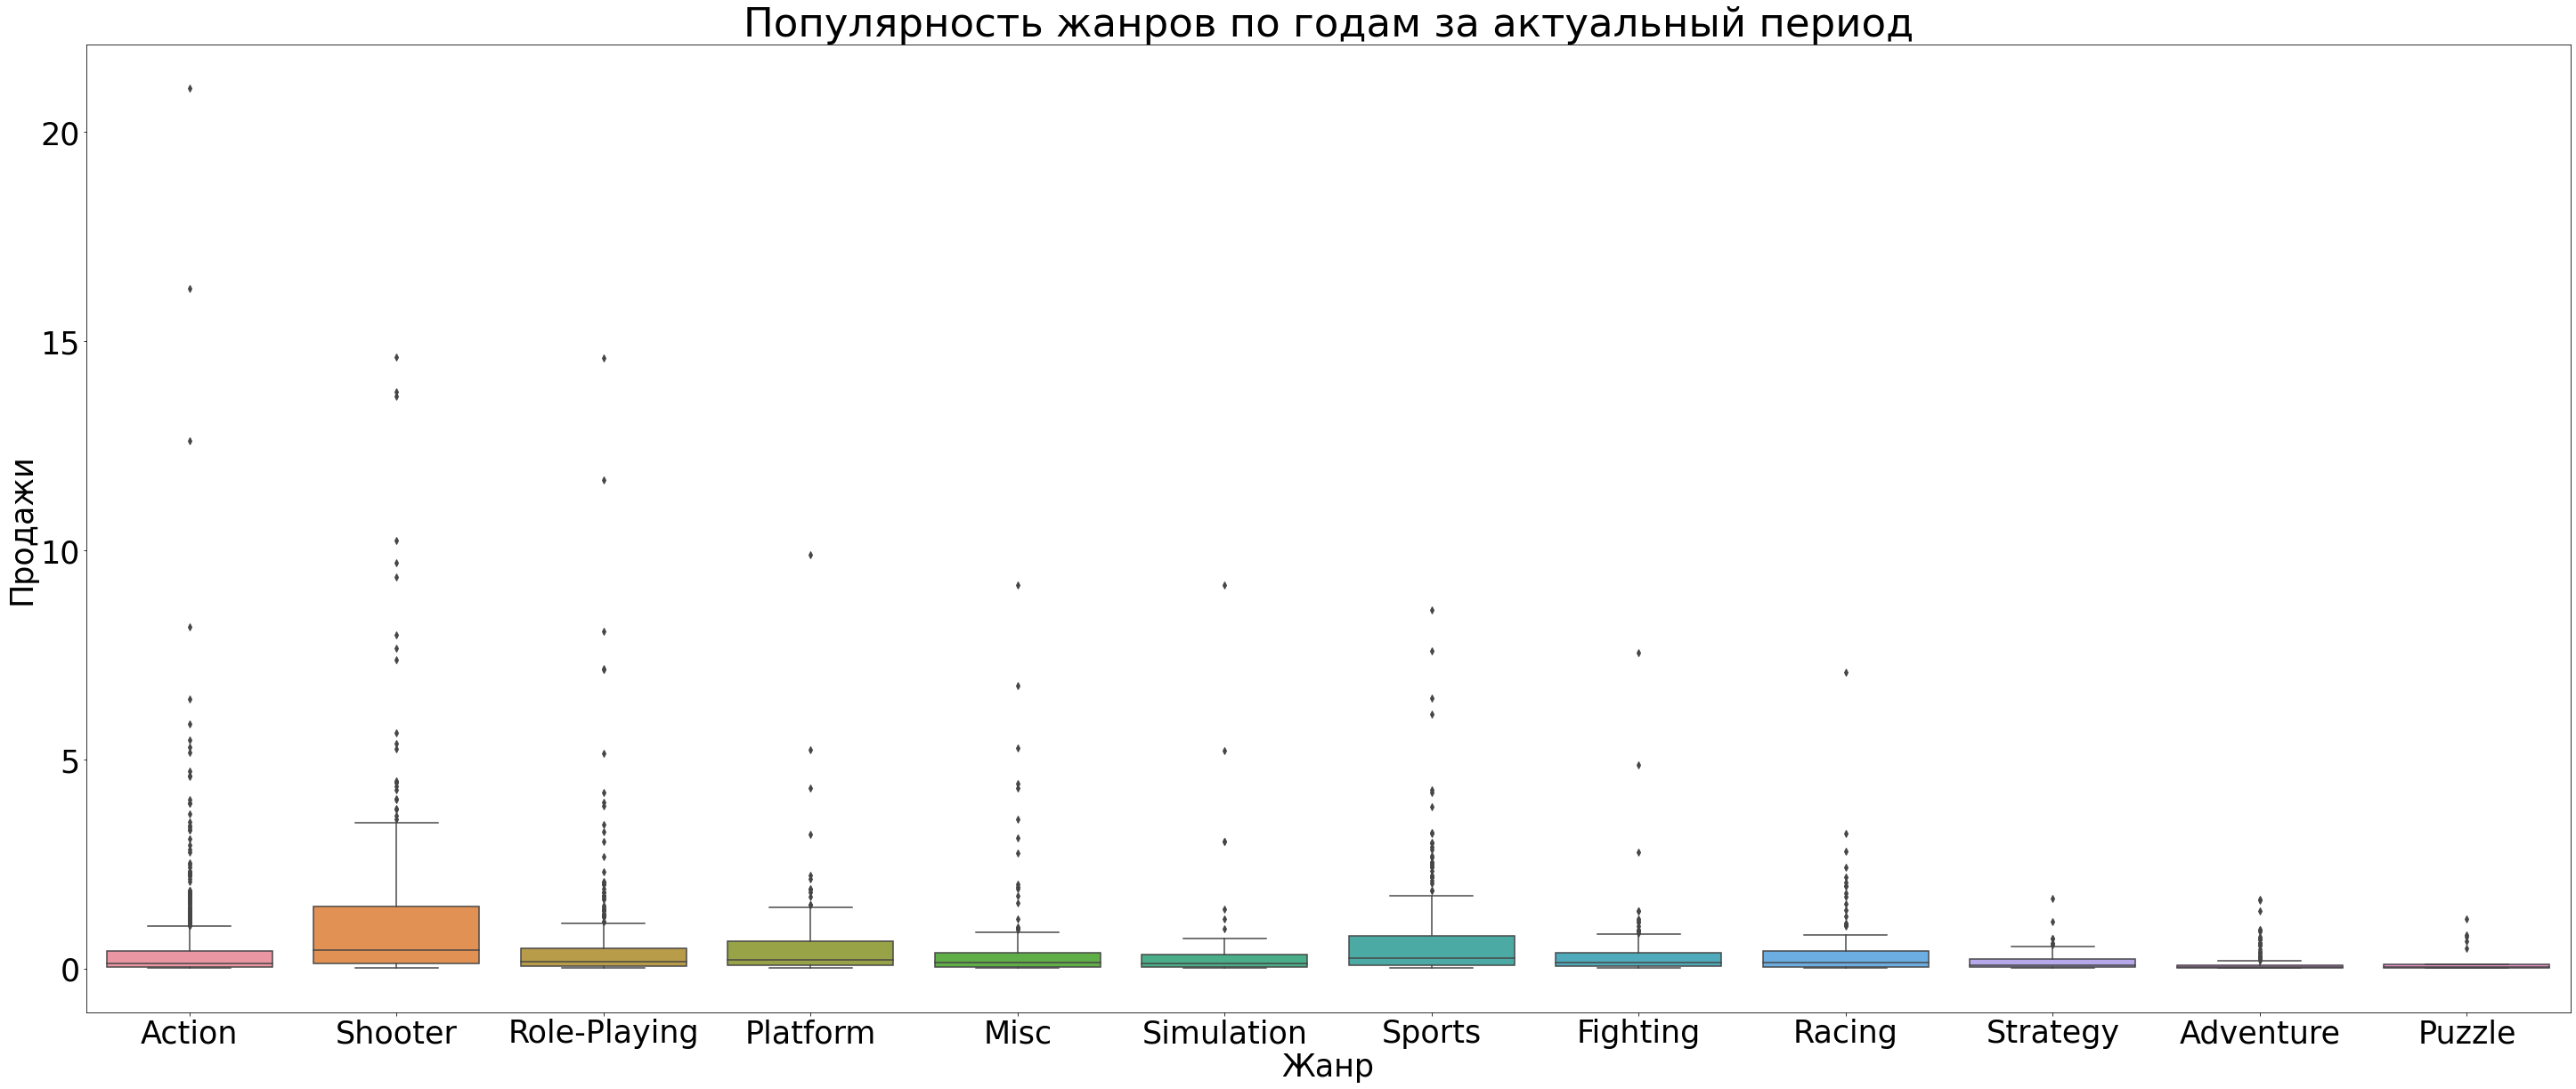

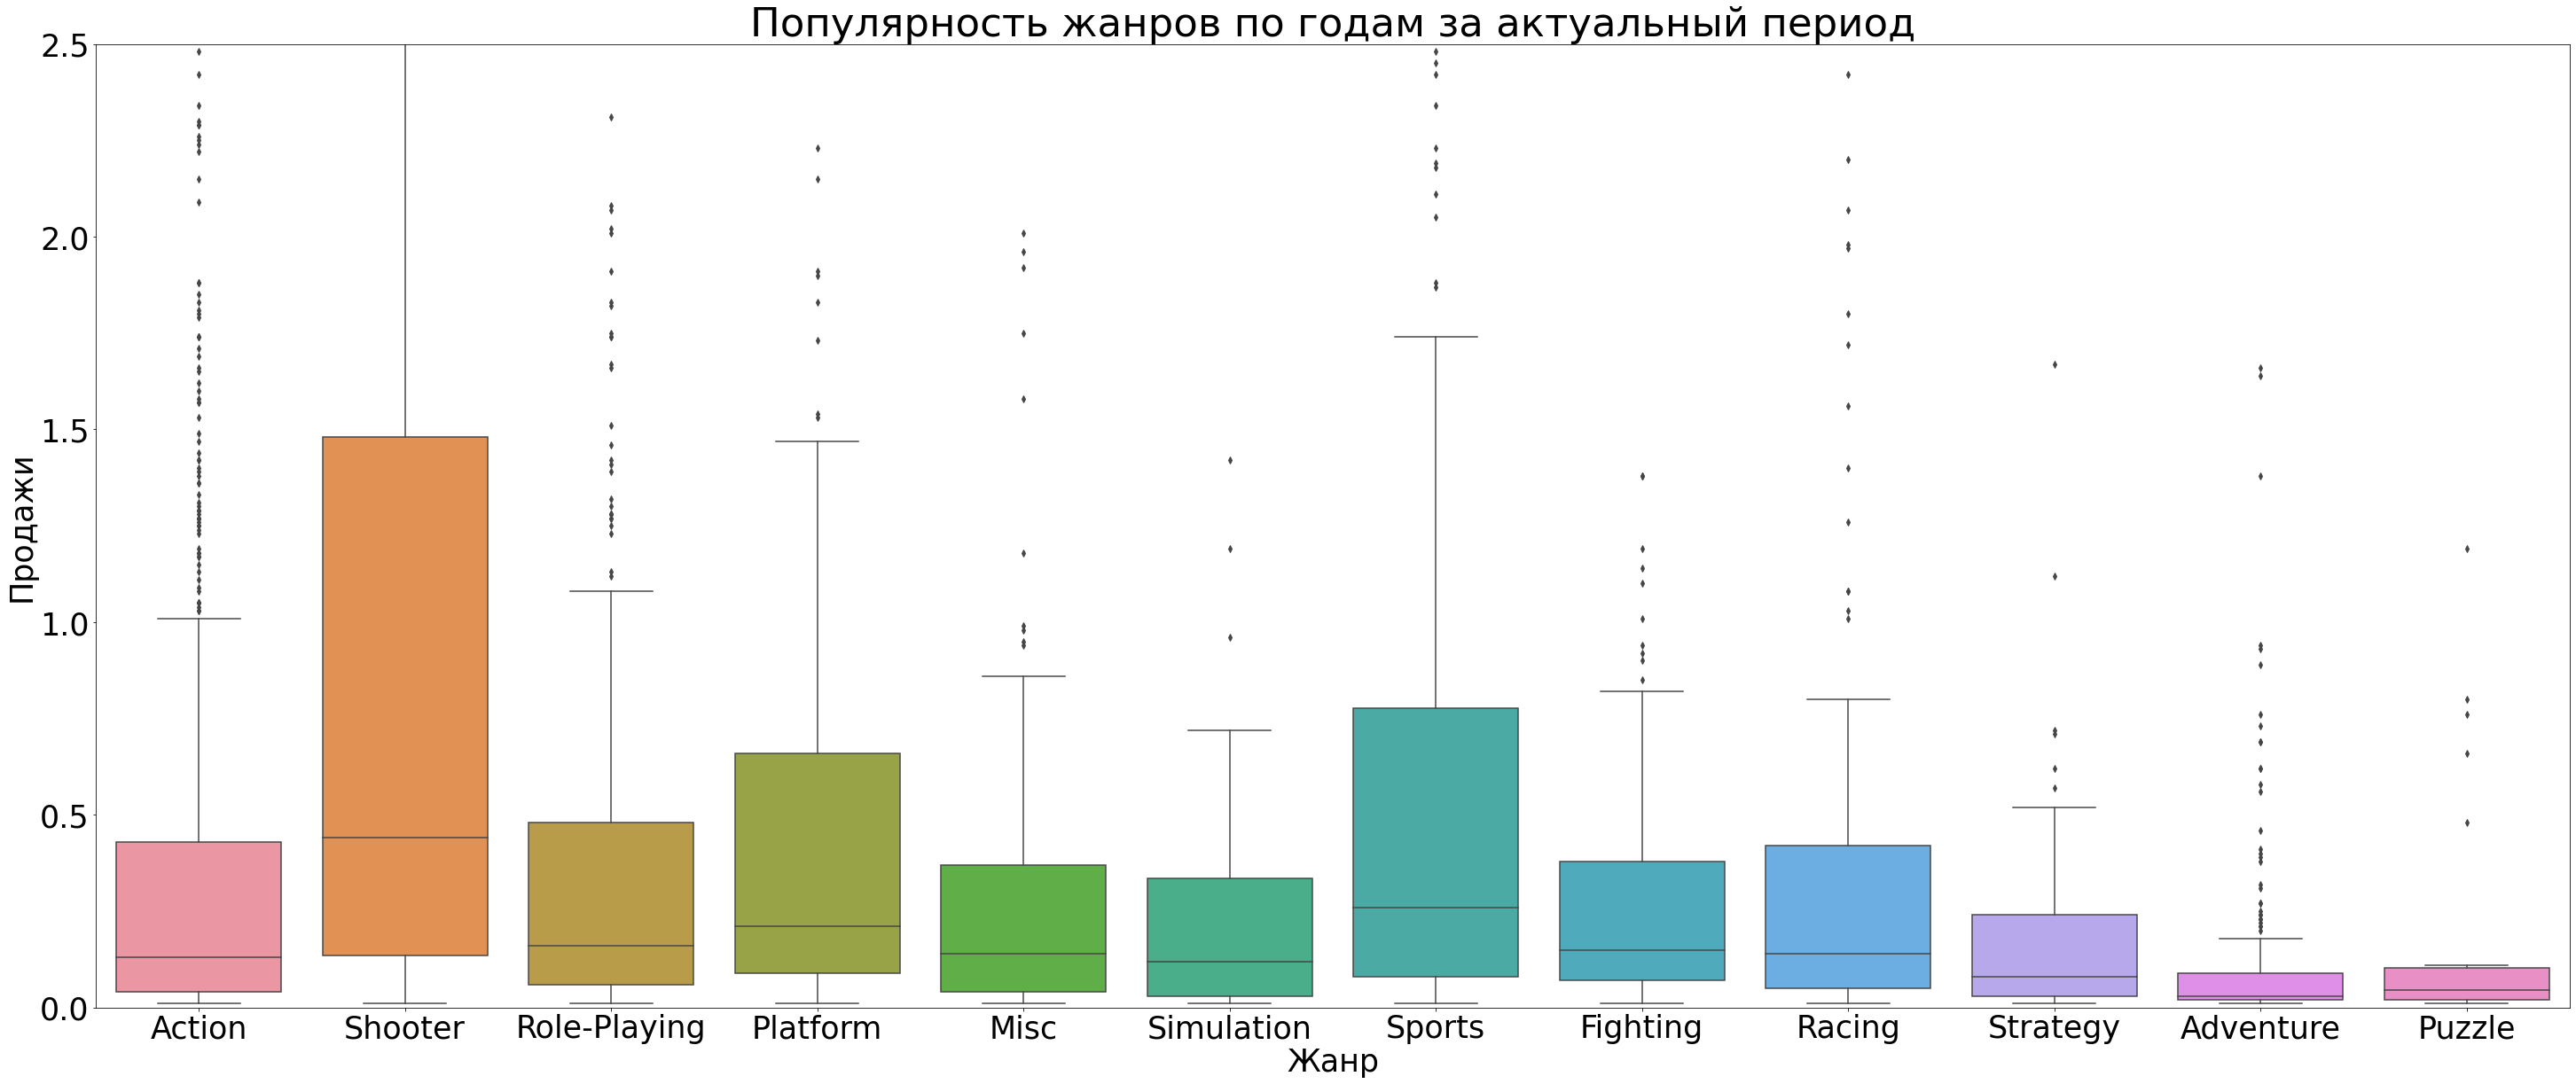

In [41]:
matplotlib.rcParams.update({'font.size': 35})
plt.figure(figsize=(50,20))
sns.boxplot(data=popular_platfroms_actual_period, y='total_sales', x='genre')
plt.title('Популярность жанров по годам за актуальный период', size=45)
plt.xlabel('Жанр', size=35)
plt.ylabel('Продажи', size=35)
plt.show()

plt.figure(figsize=(50,20))
sns.boxplot(data=popular_platfroms_actual_period, y='total_sales', x='genre').set(ylim=(0,2.5))
plt.title('Популярность жанров по годам за актуальный период', size=45)
plt.xlabel('Жанр', size=35)
plt.ylabel('Продажи', size=35)
plt.show()


**Коммент:   
**Жанр шутеры является самым прибыльным, так как имеет самую высокую медиану и 75-й квартиль, а так же немного выбросов. То есть, данный жанр на рынке ведёт себя стабильнее для разных игр и платформ** 

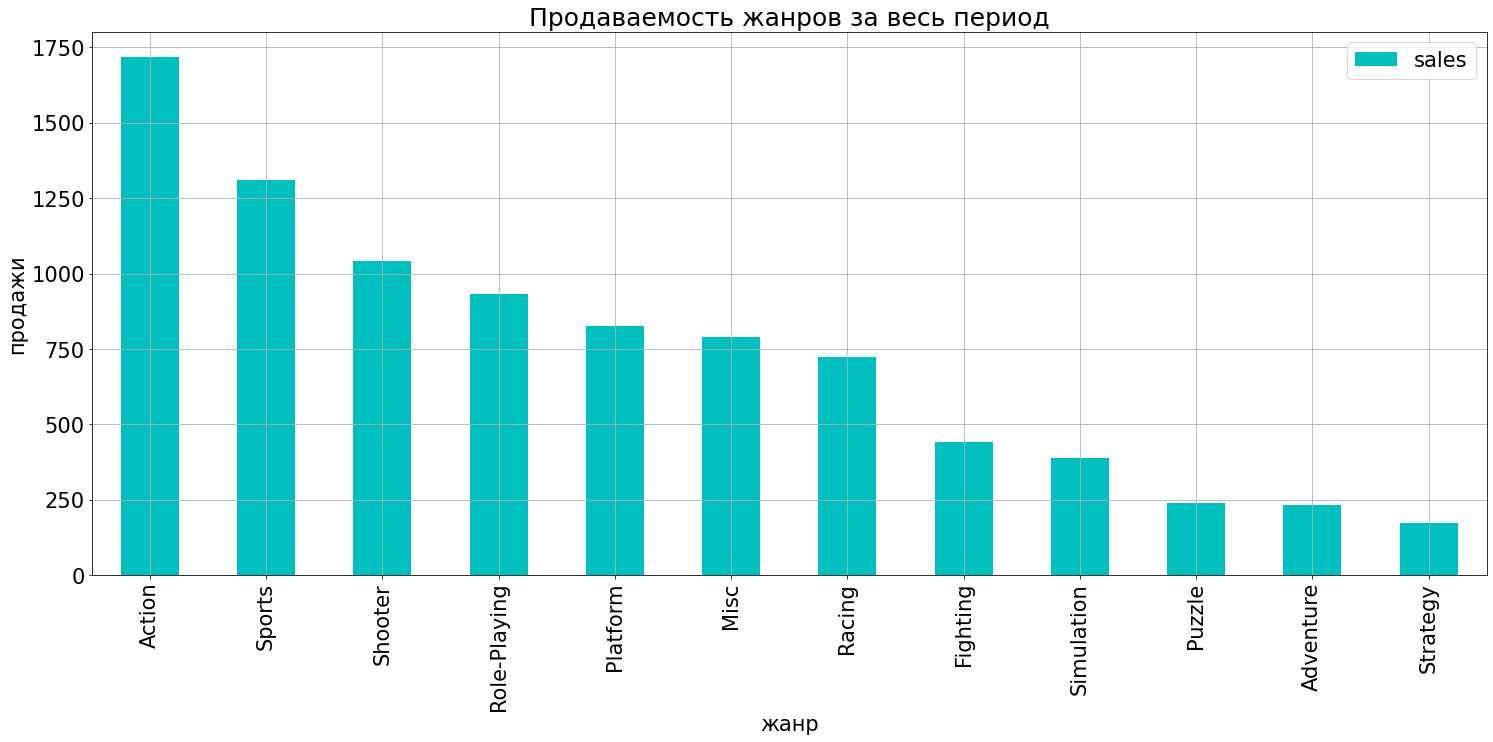

In [42]:
matplotlib.rcParams.update({'font.size': 21})
df.groupby('genre').agg(sales=('total_sales','sum')).sort_values(by=['sales'],ascending=False).plot(kind='bar', grid=True, figsize = (25,10), color='c')
plt.title('Продаваемость жанров за весь период', size=25)
plt.xlabel('жанр',size=21)
plt.ylabel('продажи', size=21)
plt.show()

**Коммент:   
**Самые продаваемые жанры за весь перирд - Action, Sports, Shooter, Role-Playing, Platform**

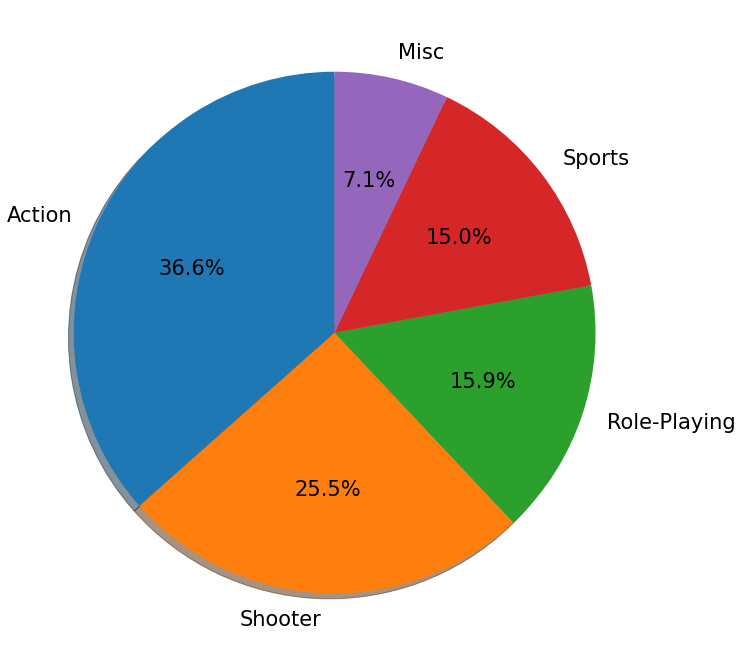

In [43]:
popular_genres=popular_platfroms_actual_period.groupby('genre').agg(sales=('total_sales','sum')).sort_values(by=['sales'],ascending=False)
popular_genres['fraction'] = round(popular_genres['sales']/popular_genres['sales'].sum()*100,2)
popular_genres = popular_genres.reset_index().head(5)
popular_genres
fig1, ax1 = plt.subplots(figsize=(18, 12))
ax1.pie(popular_genres.fraction,labels=popular_genres.genre, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

**Коммент:   
**По общим продажам лидирует жанр Action. Давайте попробуем объяснить почему же самым прибыльным жанром мы определил шутеры**

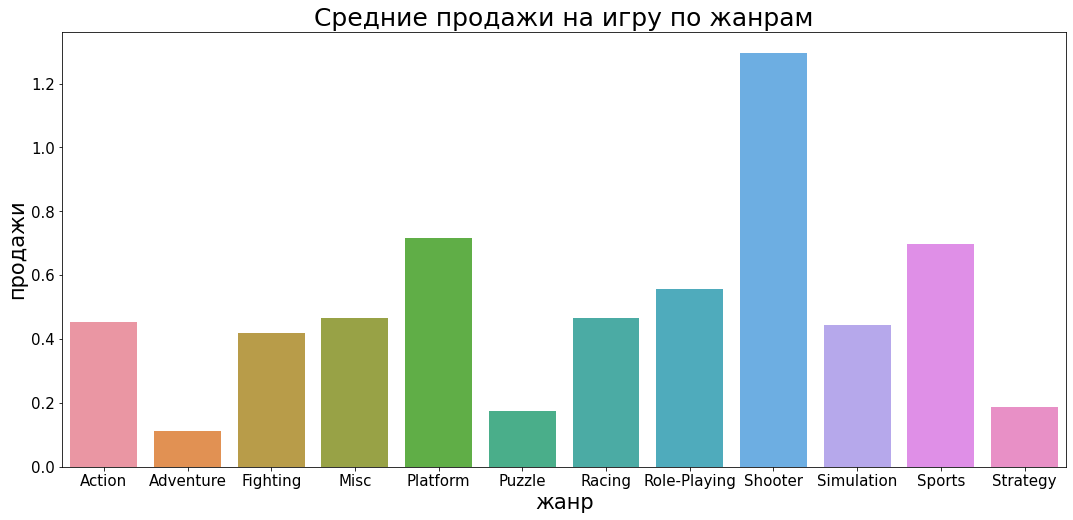

In [44]:
matplotlib.rcParams.update({'font.size': 15})
mean_sales_per_genre=popular_platfroms_actual_period.groupby('genre').agg(sales=('total_sales','sum'),games=('name','count'))
mean_sales_per_genre['mean_sales'] = mean_sales_per_genre['sales']/mean_sales_per_genre['games']
mean_sales_per_genre = mean_sales_per_genre.reset_index()
mean_sales_per_genre
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="genre", y="mean_sales",data=mean_sales_per_genre)
plt.title('Средние продажи на игру по жанрам', size=25)
plt.xlabel('жанр',size=21)
plt.ylabel('продажи', size=21)
plt.show()


**Коммент:   
**Как видно из графика, средние продажи на игру успешнее у шутеров, жанр экшн лидировал в общих продажах из за большего количества игр в этом жанре**

## Шаг. Составьте портрет пользователя каждого региона

#### Распределение продаж по платформам за актуальный период

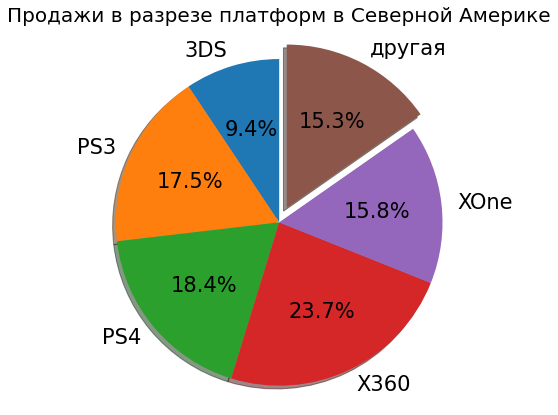

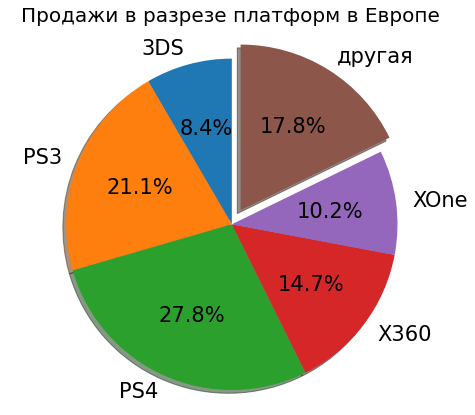

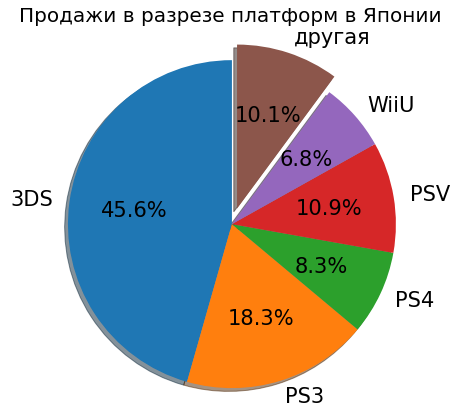

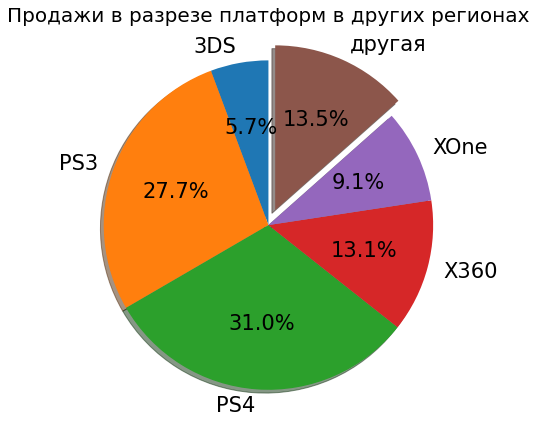

In [45]:
matplotlib.rcParams.update({'font.size': 21})
sales_na = df_actual_period.groupby('platform').agg(na_sales=('na_sales','sum')).sort_values(by=['na_sales'],ascending=False).reset_index()
sales_na_top_5 = sales_na.head(5)['platform'].unique()
sales_na['platfrom_category'] = np.where(sales_na['platform'].isin(sales_na_top_5),sales_na.platform,'другая')
sales_na = sales_na.groupby('platfrom_category').agg(sales=('na_sales','sum')).reset_index()
sales_na['fraction'] = round(sales_na['sales']/sales_na['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_na.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_na.platfrom_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в Северной Америке', size=20)
plt.show()


sales_eu = df_actual_period.groupby('platform').agg(eu_sales=('eu_sales','sum')).sort_values(by=['eu_sales'],ascending=False).reset_index()
sales_eu_top_5 = sales_eu.head(5)['platform'].unique()
sales_eu['platfrom_category'] = np.where(sales_eu['platform'].isin(sales_eu_top_5),sales_eu.platform,'другая')
sales_eu = sales_eu.groupby('platfrom_category').agg(sales=('eu_sales','sum')).reset_index()
sales_eu['fraction'] = round(sales_eu['sales']/sales_eu['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_eu.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_eu.platfrom_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в Европе', size=20)
plt.show()



sales_jp = df_actual_period.groupby('platform').agg(jp_sales=('jp_sales','sum')).sort_values(by=['jp_sales'],ascending=False).reset_index()
sales_jp_top_5 = sales_jp.head(5)['platform'].unique()
sales_jp['platfrom_category'] = np.where(sales_jp['platform'].isin(sales_jp_top_5),sales_jp.platform,'другая')
sales_jp = sales_jp.groupby('platfrom_category').agg(sales=('jp_sales','sum')).reset_index()
sales_jp['fraction'] = round(sales_jp['sales']/sales_jp['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_jp.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_jp.platfrom_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в Японии', size=20)
plt.show()



sales_other = df_actual_period.groupby('platform').agg(other_sales=('other_sales','sum')).sort_values(by=['other_sales'],ascending=False).reset_index()
sales_other_top_5 = sales_other.head(5)['platform'].unique()
sales_other['platfrom_category'] = np.where(sales_other['platform'].isin(sales_other_top_5),sales_other.platform,'другая')
sales_other = sales_other.groupby('platfrom_category').agg(sales=('other_sales','sum')).reset_index()
sales_other['fraction'] = round(sales_other['sales']/sales_other['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_other.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_other.platfrom_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в других регионах', size=20)
plt.show()

**Коммент:  
**В Японии тенденция отличается от  остальных регионов. 3DS там самая популярная платформа, с долей почти 50%, в то время как в других регионах её для не превышает 9%. Так же Япония единственный регион, где PS3 всё ещё больше распространена чем PS4. Так же интересно, что во всех регионах Xone и X360 входят в топ-5, а в Японии вместо них PSV и Wiiu**

In [46]:
df_actual_period['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

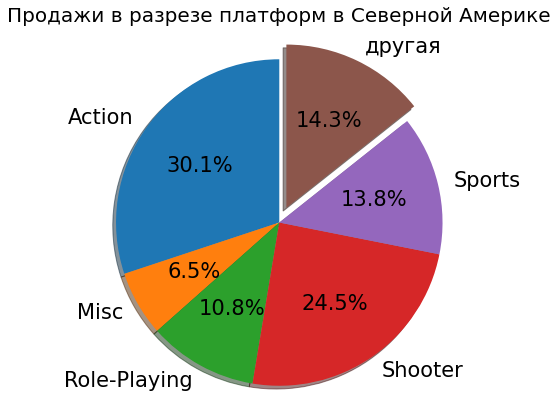

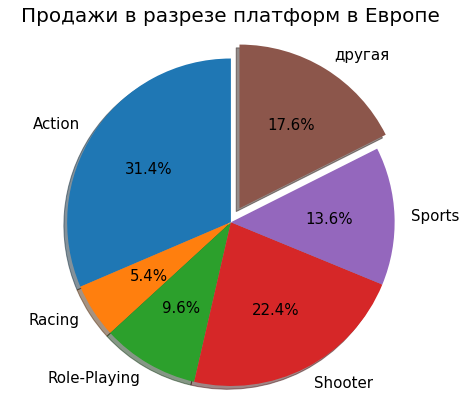

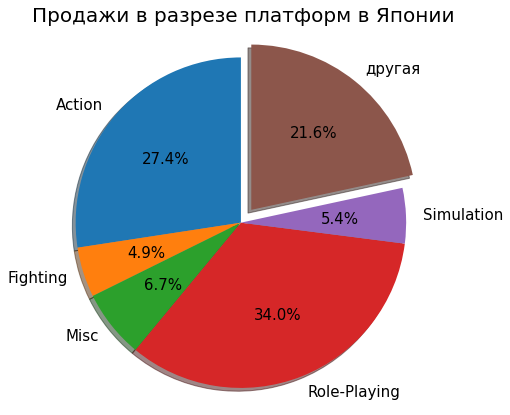

In [47]:
sales_genre_na = df_actual_period.groupby('genre').agg(na_genre_sales=('na_sales','sum')).sort_values(by=['na_genre_sales'],ascending=False).reset_index()
sales_genre_na_top_5 = sales_genre_na.head(5)['genre'].unique()
sales_genre_na['genre_category'] = np.where(sales_genre_na['genre'].isin(sales_genre_na_top_5),sales_genre_na.genre,'другая')
sales_genre_na = sales_genre_na.groupby('genre_category').agg(sales=('na_genre_sales','sum')).reset_index()
sales_genre_na['fraction'] = round(sales_genre_na['sales']/sales_genre_na['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_genre_na.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_genre_na.genre_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в Северной Америке', size=20)
plt.show()
matplotlib.rcParams.update({'font.size': 15})


sales_genre_eu = df_actual_period.groupby('genre').agg(eu_genre_sales=('eu_sales','sum')).sort_values(by=['eu_genre_sales'],ascending=False).reset_index()
sales_genre_eu_top_5 = sales_genre_eu.head(5)['genre'].unique()
sales_genre_eu['genre_category'] = np.where(sales_genre_eu['genre'].isin(sales_genre_eu_top_5),sales_genre_eu.genre,'другая')
sales_genre_eu = sales_genre_eu.groupby('genre_category').agg(sales=('eu_genre_sales','sum')).reset_index()
sales_genre_eu['fraction'] = round(sales_genre_eu['sales']/sales_genre_eu['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_genre_eu.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_genre_eu.genre_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в Европе', size=20)
plt.show()
matplotlib.rcParams.update({'font.size': 15})


sales_genre_jp = df_actual_period.groupby('genre').agg(jp_genre_sales=('jp_sales','sum')).sort_values(by=['jp_genre_sales'],ascending=False).reset_index()
sales_genre_jp_top_5 = sales_genre_jp.head(5)['genre'].unique()
sales_genre_jp['genre_category'] = np.where(sales_genre_jp['genre'].isin(sales_genre_jp_top_5),sales_genre_jp.genre,'другая')
sales_genre_jp = sales_genre_jp.groupby('genre_category').agg(sales=('jp_genre_sales','sum')).reset_index()
sales_genre_jp['fraction'] = round(sales_genre_jp['sales']/sales_genre_jp['sales'].sum()*100,2)
fig1, ax1 = plt.subplots(figsize=(8, 7))
ax1.pie(sales_genre_jp.fraction,explode = (0, 0, 0, 0, 0, 0.1),labels=sales_genre_jp.genre_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Продажи в разрезе платформ в Японии', size=20)
plt.show()
matplotlib.rcParams.update({'font.size': 15})

**Коммент:  
**Касательно жанров, Япония так же отличается. "Role-playing' там самый популярный, в то время как в США и Европе он лишь 4-й. Так же шутеры и спорт, которые в топ-2 в других регионах, в Японии даже не в топ-5.**

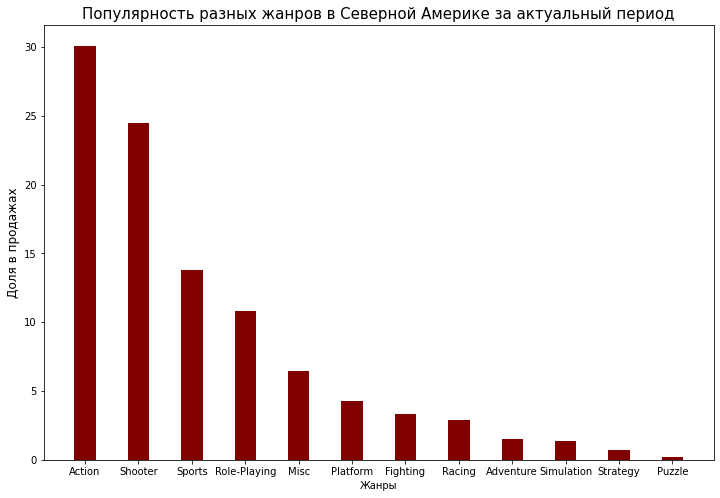

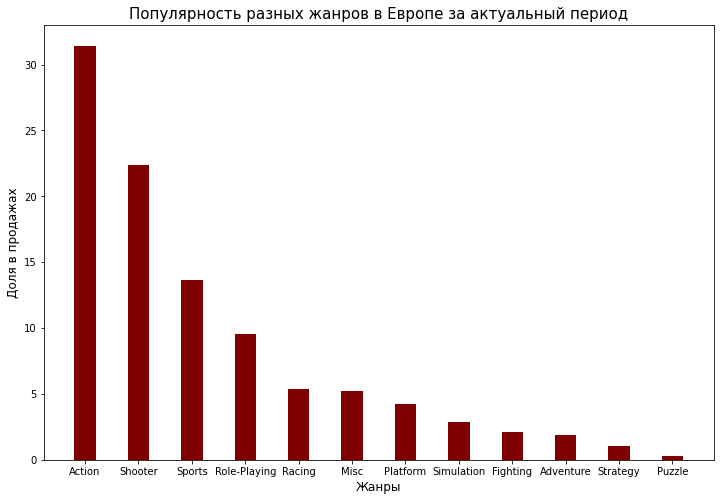

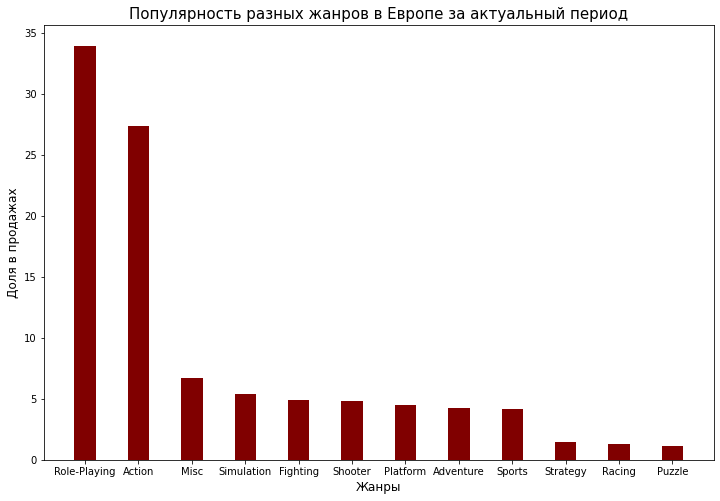

In [48]:
matplotlib.rcParams.update({'font.size': 10}) 
df_actual_period_genre_na = df_actual_period.groupby(['genre']).agg(na_sales=('na_sales','sum')).reset_index().sort_values(by=['na_sales'],ascending=False).reset_index(drop=True)
df_actual_period_genre_na['fraction'] = round(df_actual_period_genre_na['na_sales']/df_actual_period_genre_na['na_sales'].sum()*100,2)
df_actual_period_genre_na
genres_na = df_actual_period_genre_na['genre']
fraction_na = df_actual_period_genre_na['fraction']

fig = plt.figure(figsize = (12, 8))
 
# creating the bar plot
plt.bar(genres_na, fraction_na, color ='maroon',
        width = 0.4)
matplotlib.rcParams.update({'font.size': 10}) 
plt.xlabel("Жанры",size=10)
plt.ylabel("Доля в продажах",size=12)
plt.title("Популярность разных жанров в Северной Америке за актуальный период",size=15)
plt.show()


df_actual_period_genre_eu = df_actual_period.groupby(['genre']).agg(eu_sales=('eu_sales','sum')).reset_index().sort_values(by=['eu_sales'],ascending=False).reset_index(drop=True)
df_actual_period_genre_eu['fraction'] = round(df_actual_period_genre_eu['eu_sales']/df_actual_period_genre_eu['eu_sales'].sum()*100,2)
df_actual_period_genre_eu
genres_eu = df_actual_period_genre_eu['genre']
fraction_eu = df_actual_period_genre_eu['fraction']

fig = plt.figure(figsize = (12, 8))
 
# creating the bar plot
plt.bar(genres_eu, fraction_eu, color ='maroon',
        width = 0.4)

plt.xlabel("Жанры",size=12)
plt.ylabel("Доля в продажах",size=12)
plt.title("Популярность разных жанров в Европе за актуальный период",size=15)
plt.show()



df_actual_period_genre_jp = df_actual_period.groupby(['genre']).agg(jp_sales=('jp_sales','sum')).reset_index().sort_values(by=['jp_sales'],ascending=False).reset_index(drop=True)
df_actual_period_genre_jp['fraction'] = round(df_actual_period_genre_jp['jp_sales']/df_actual_period_genre_jp['jp_sales'].sum()*100,2)
df_actual_period_genre_jp
genres_jp = df_actual_period_genre_jp['genre']
fraction_jp = df_actual_period_genre_jp['fraction']

fig = plt.figure(figsize = (12, 8))
 
# creating the bar plot
plt.bar(genres_jp, fraction_jp, color ='maroon',
        width = 0.4)
plt.xlabel("Жанры",size=12)
plt.ylabel("Доля в продажах",size=12)
plt.title("Популярность разных жанров в Европе за актуальный период",size=15)
plt.show()



In [49]:
matplotlib.rcParams.update({'font.size': 13}) 
regions = df_actual_period.copy()
regions
regions2 = regions.columns[4:7]
regions2

Index(['na_sales', 'eu_sales', 'jp_sales'], dtype='object')

**Коммент:  
**Данный график подтверждает предыдущий вывод**

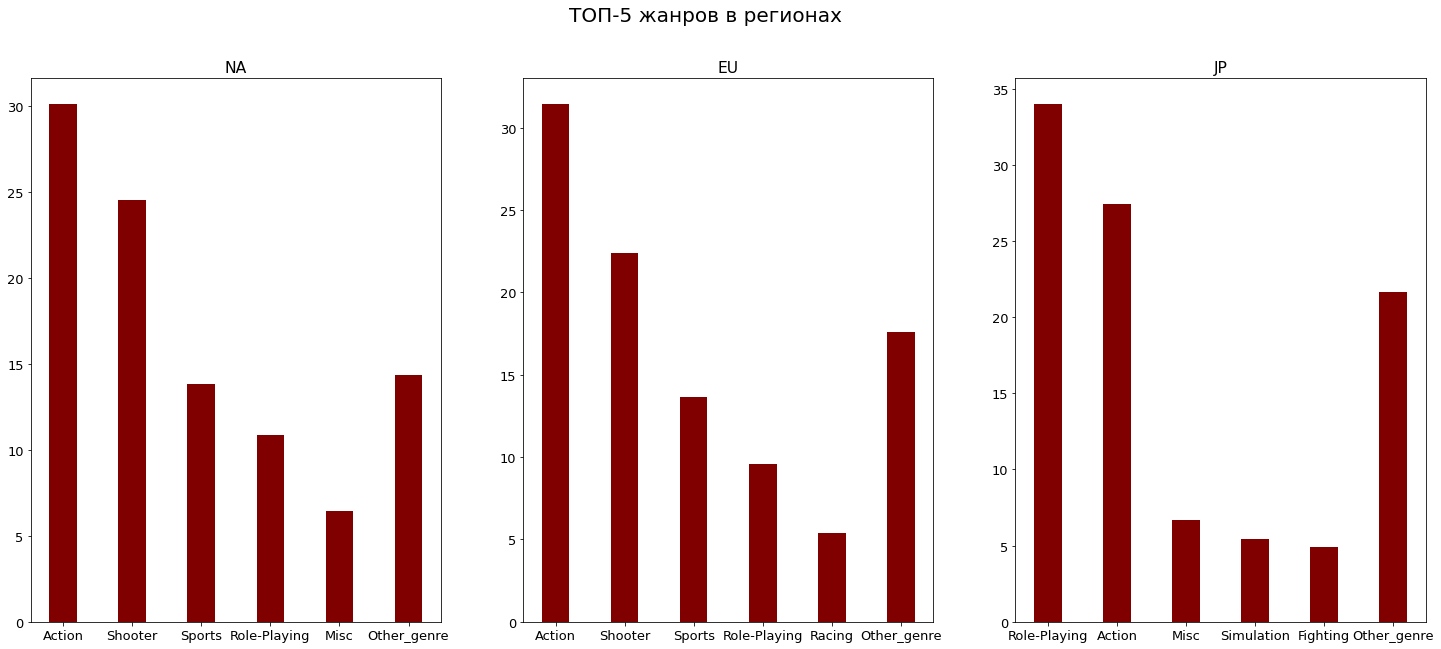

In [50]:
matplotlib.rcParams.update({'font.size': 13}) 
regions = df_actual_period.copy()
regions
regions2 = regions.columns[4:7]
regions2
fig, axs= plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle('ТОП-5 жанров в регионах',size=20)
for i in range(3):
    df_i = (regions.groupby(['genre'])[regions2[i]].sum().
             reset_index().
             sort_values(regions2[i], ascending = False, ignore_index = True).
             head(5))
    df_i = df_i.append({'genre': 'Other_genre', regions2[i]: regions[regions2[i]].sum() - df_i[regions2[i]].sum()}, ignore_index= True)
    df_i['fraction'] = round(df_i[regions2[i]]/regions[regions2[i]].sum()*100,2)
    axs[i].bar(df_i['genre'], df_i['fraction'], color ='maroon',
        width = 0.4)
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())

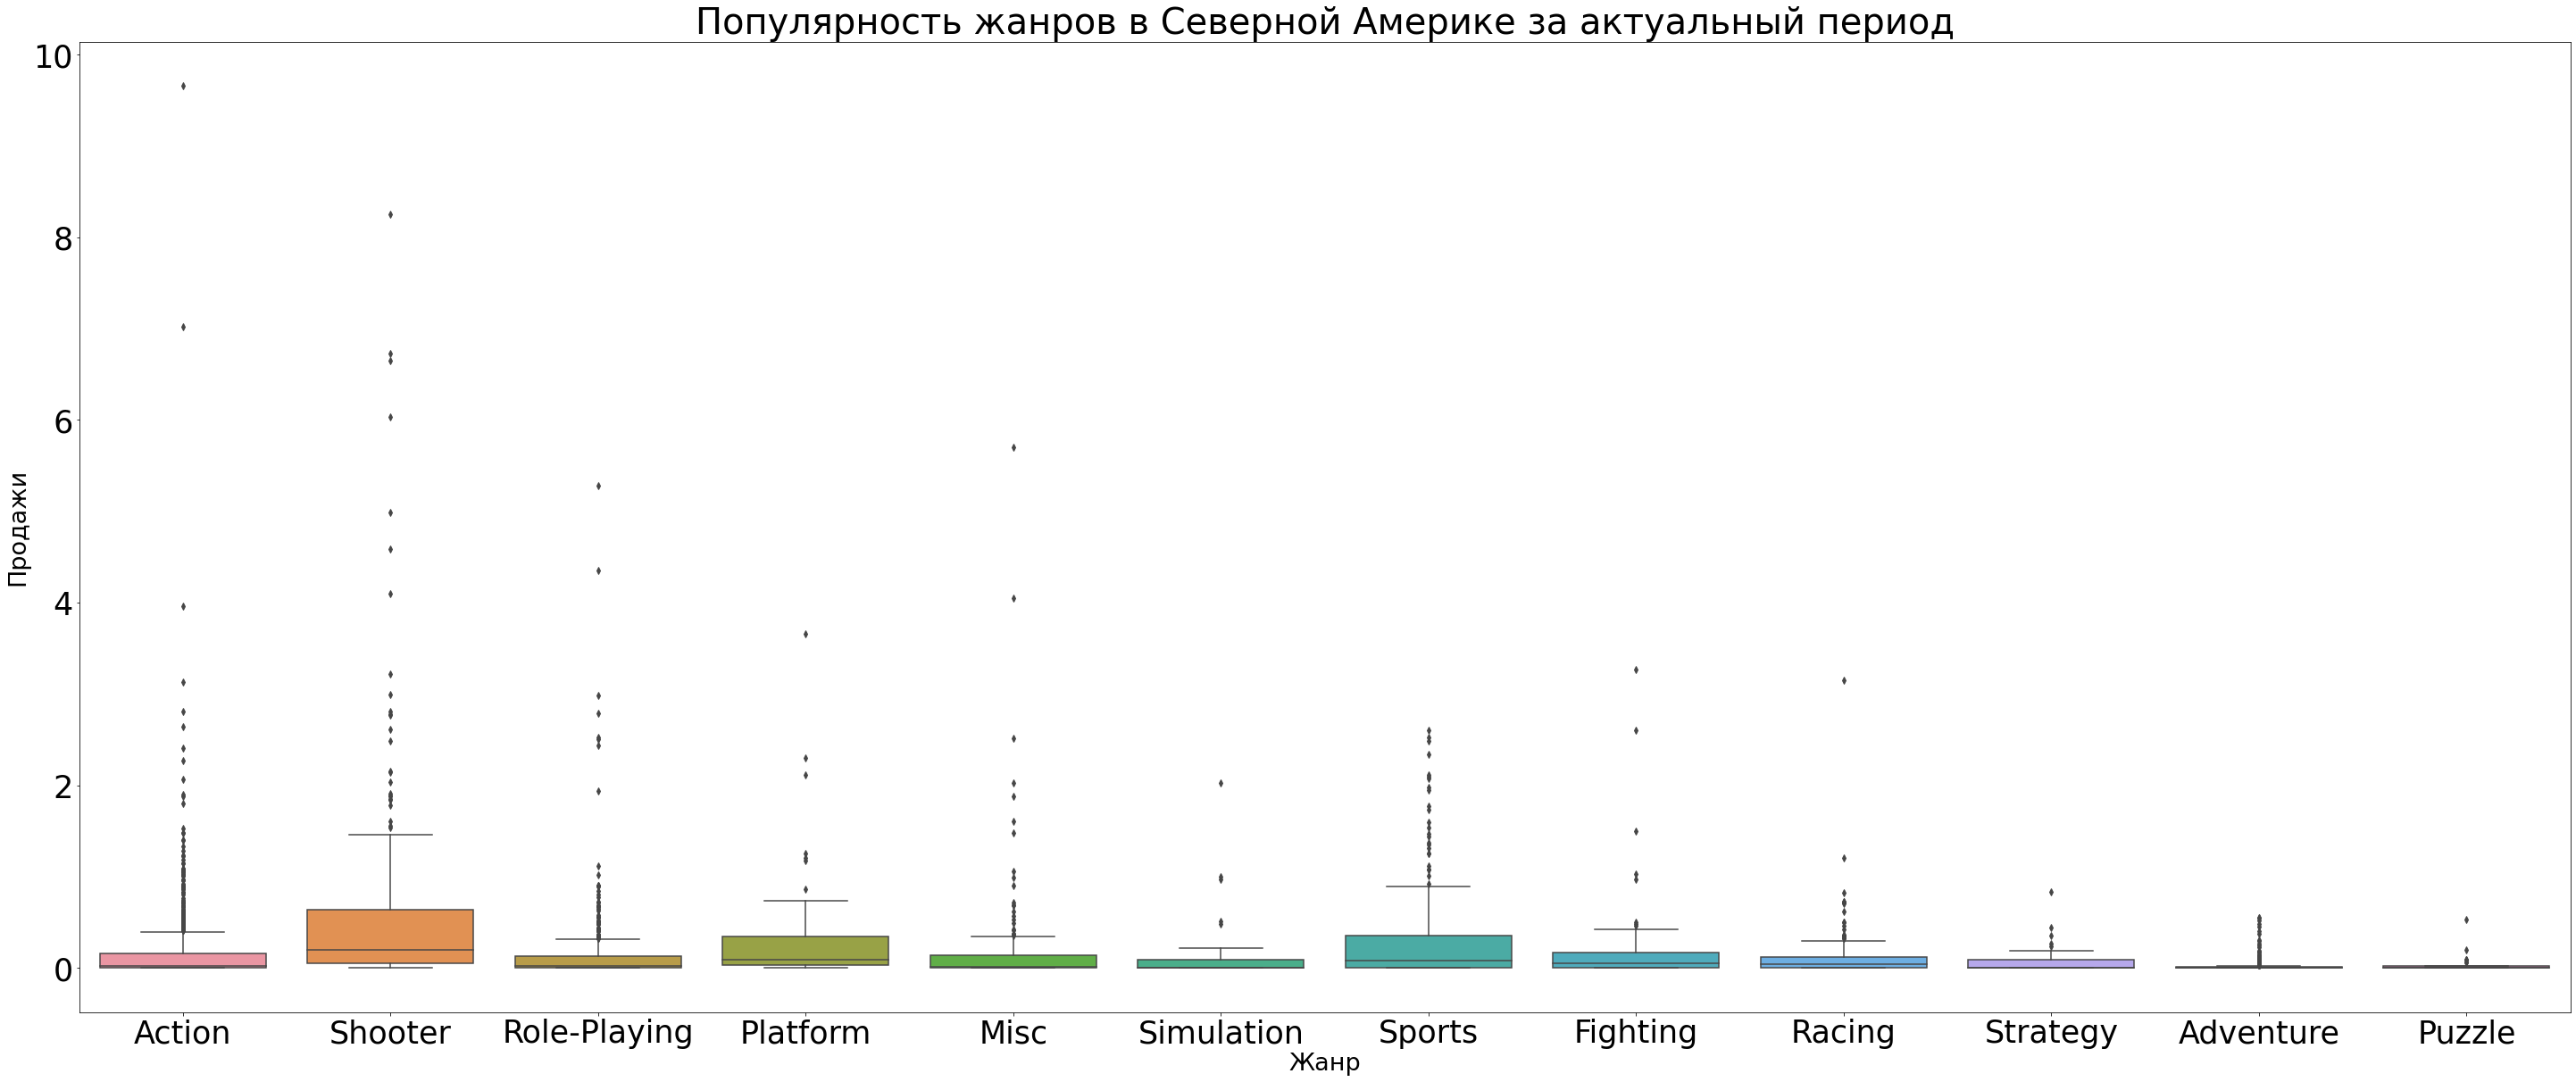

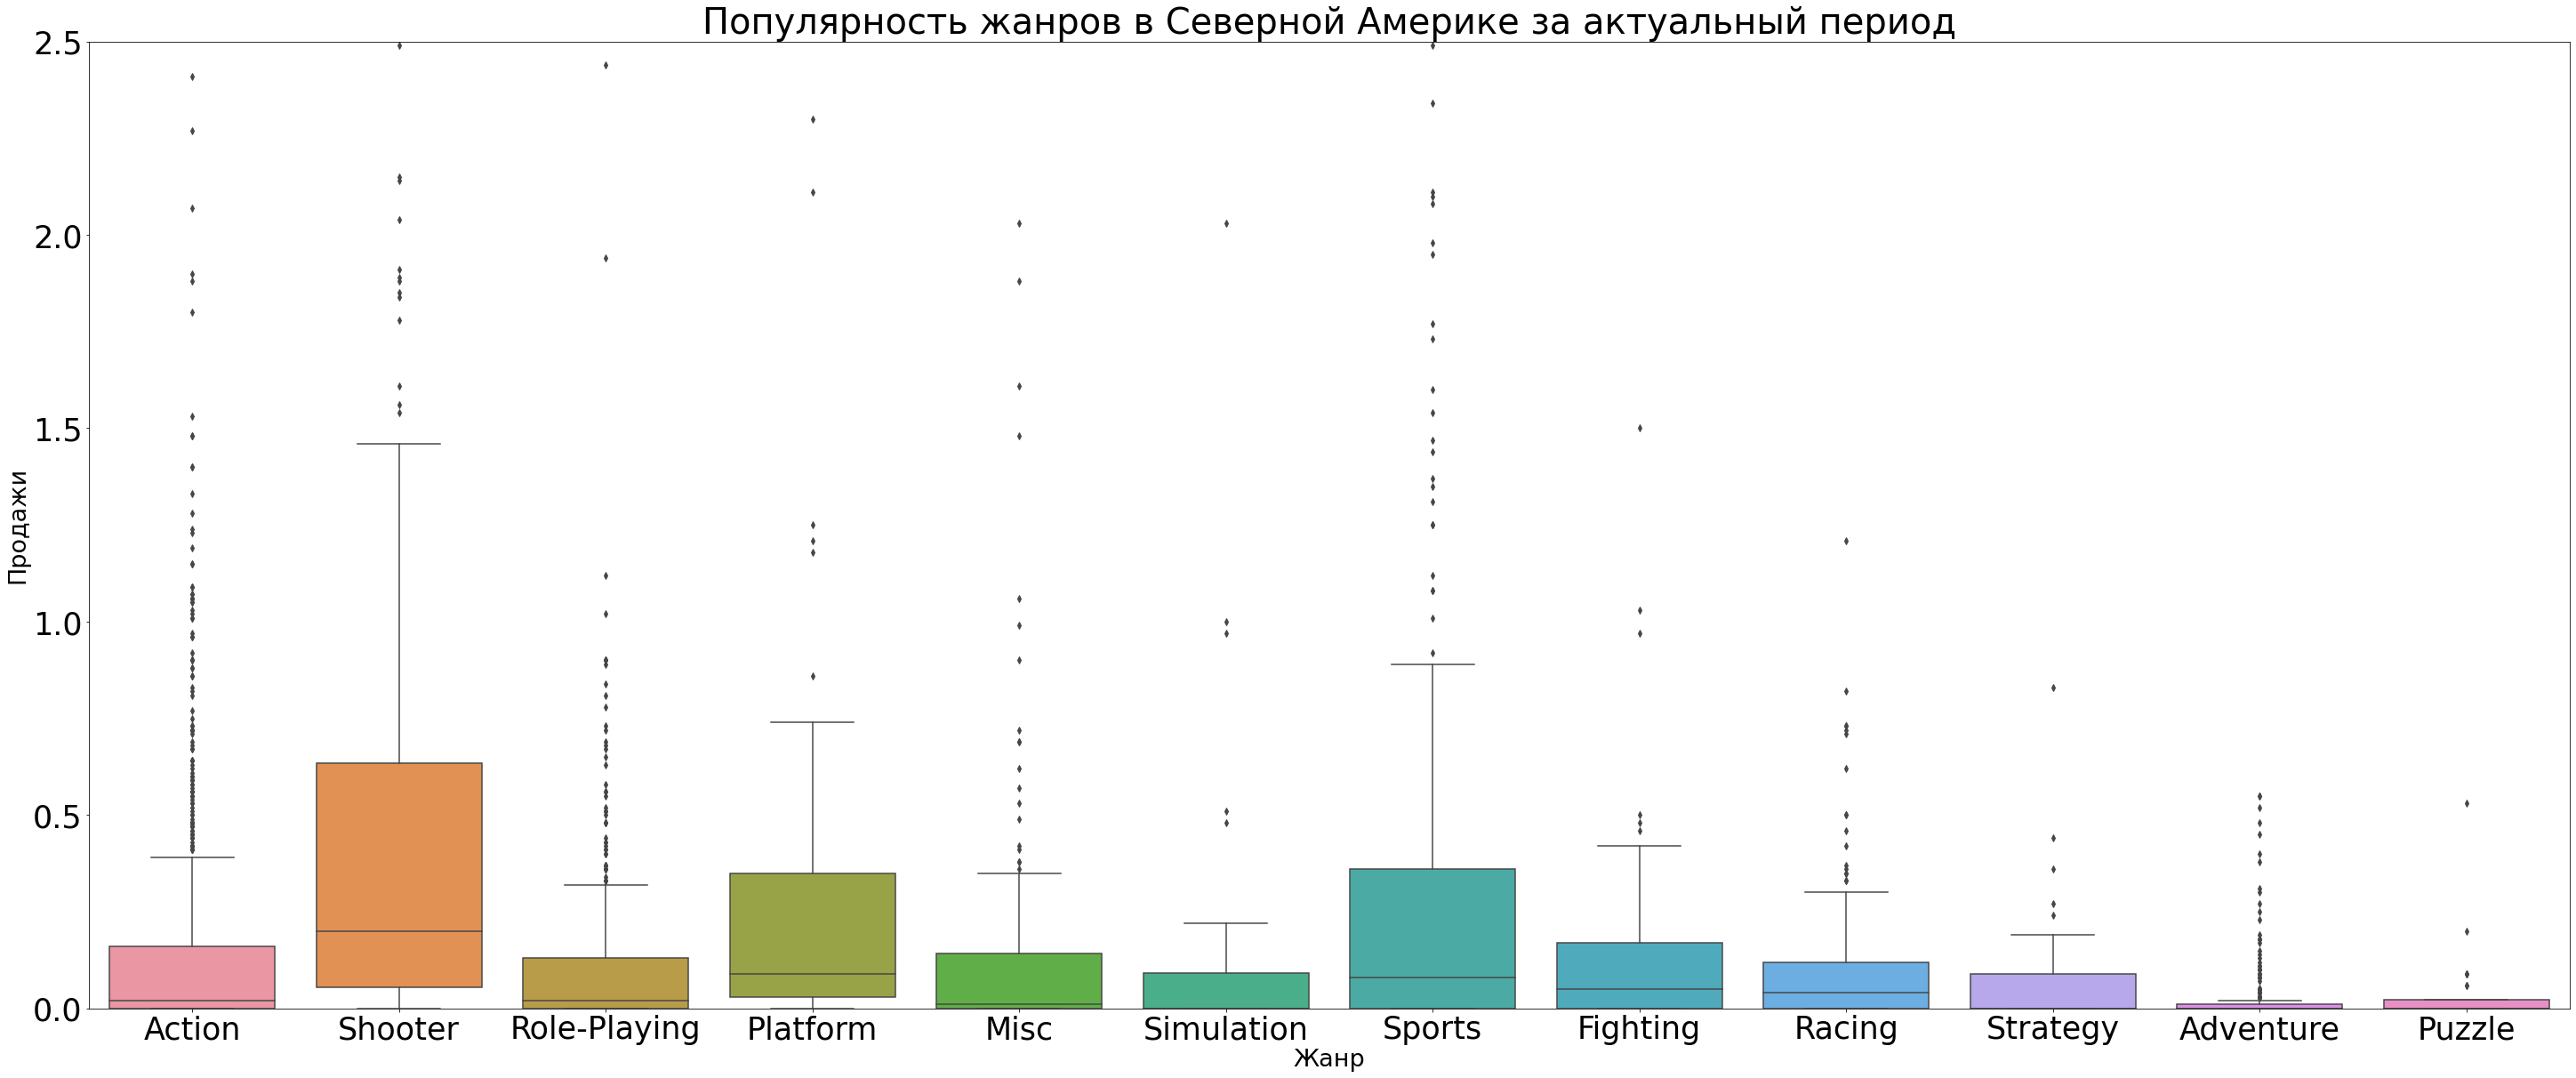

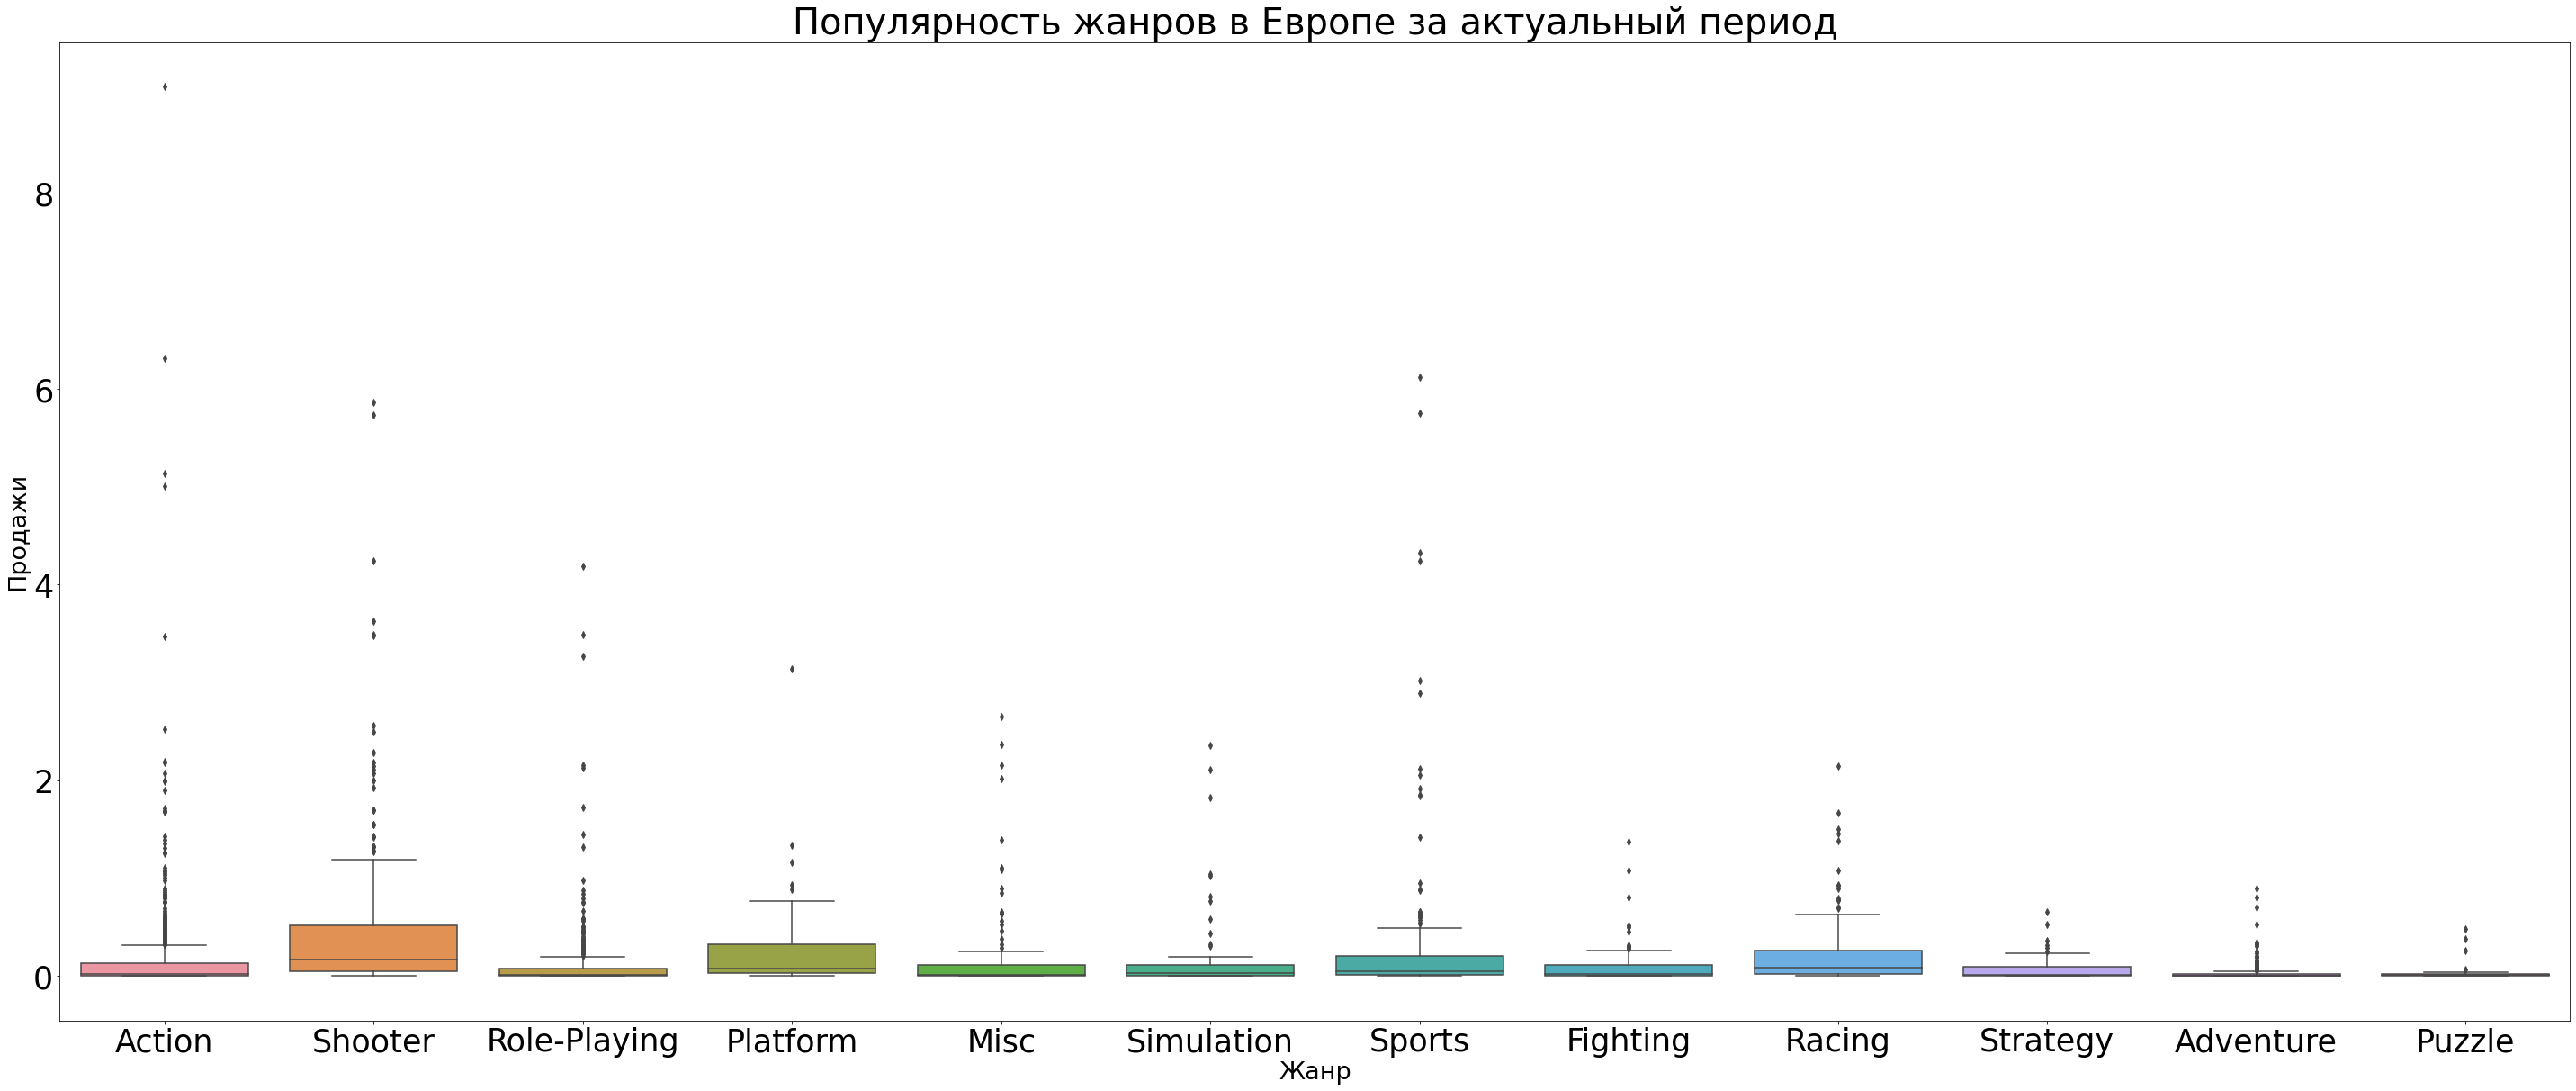

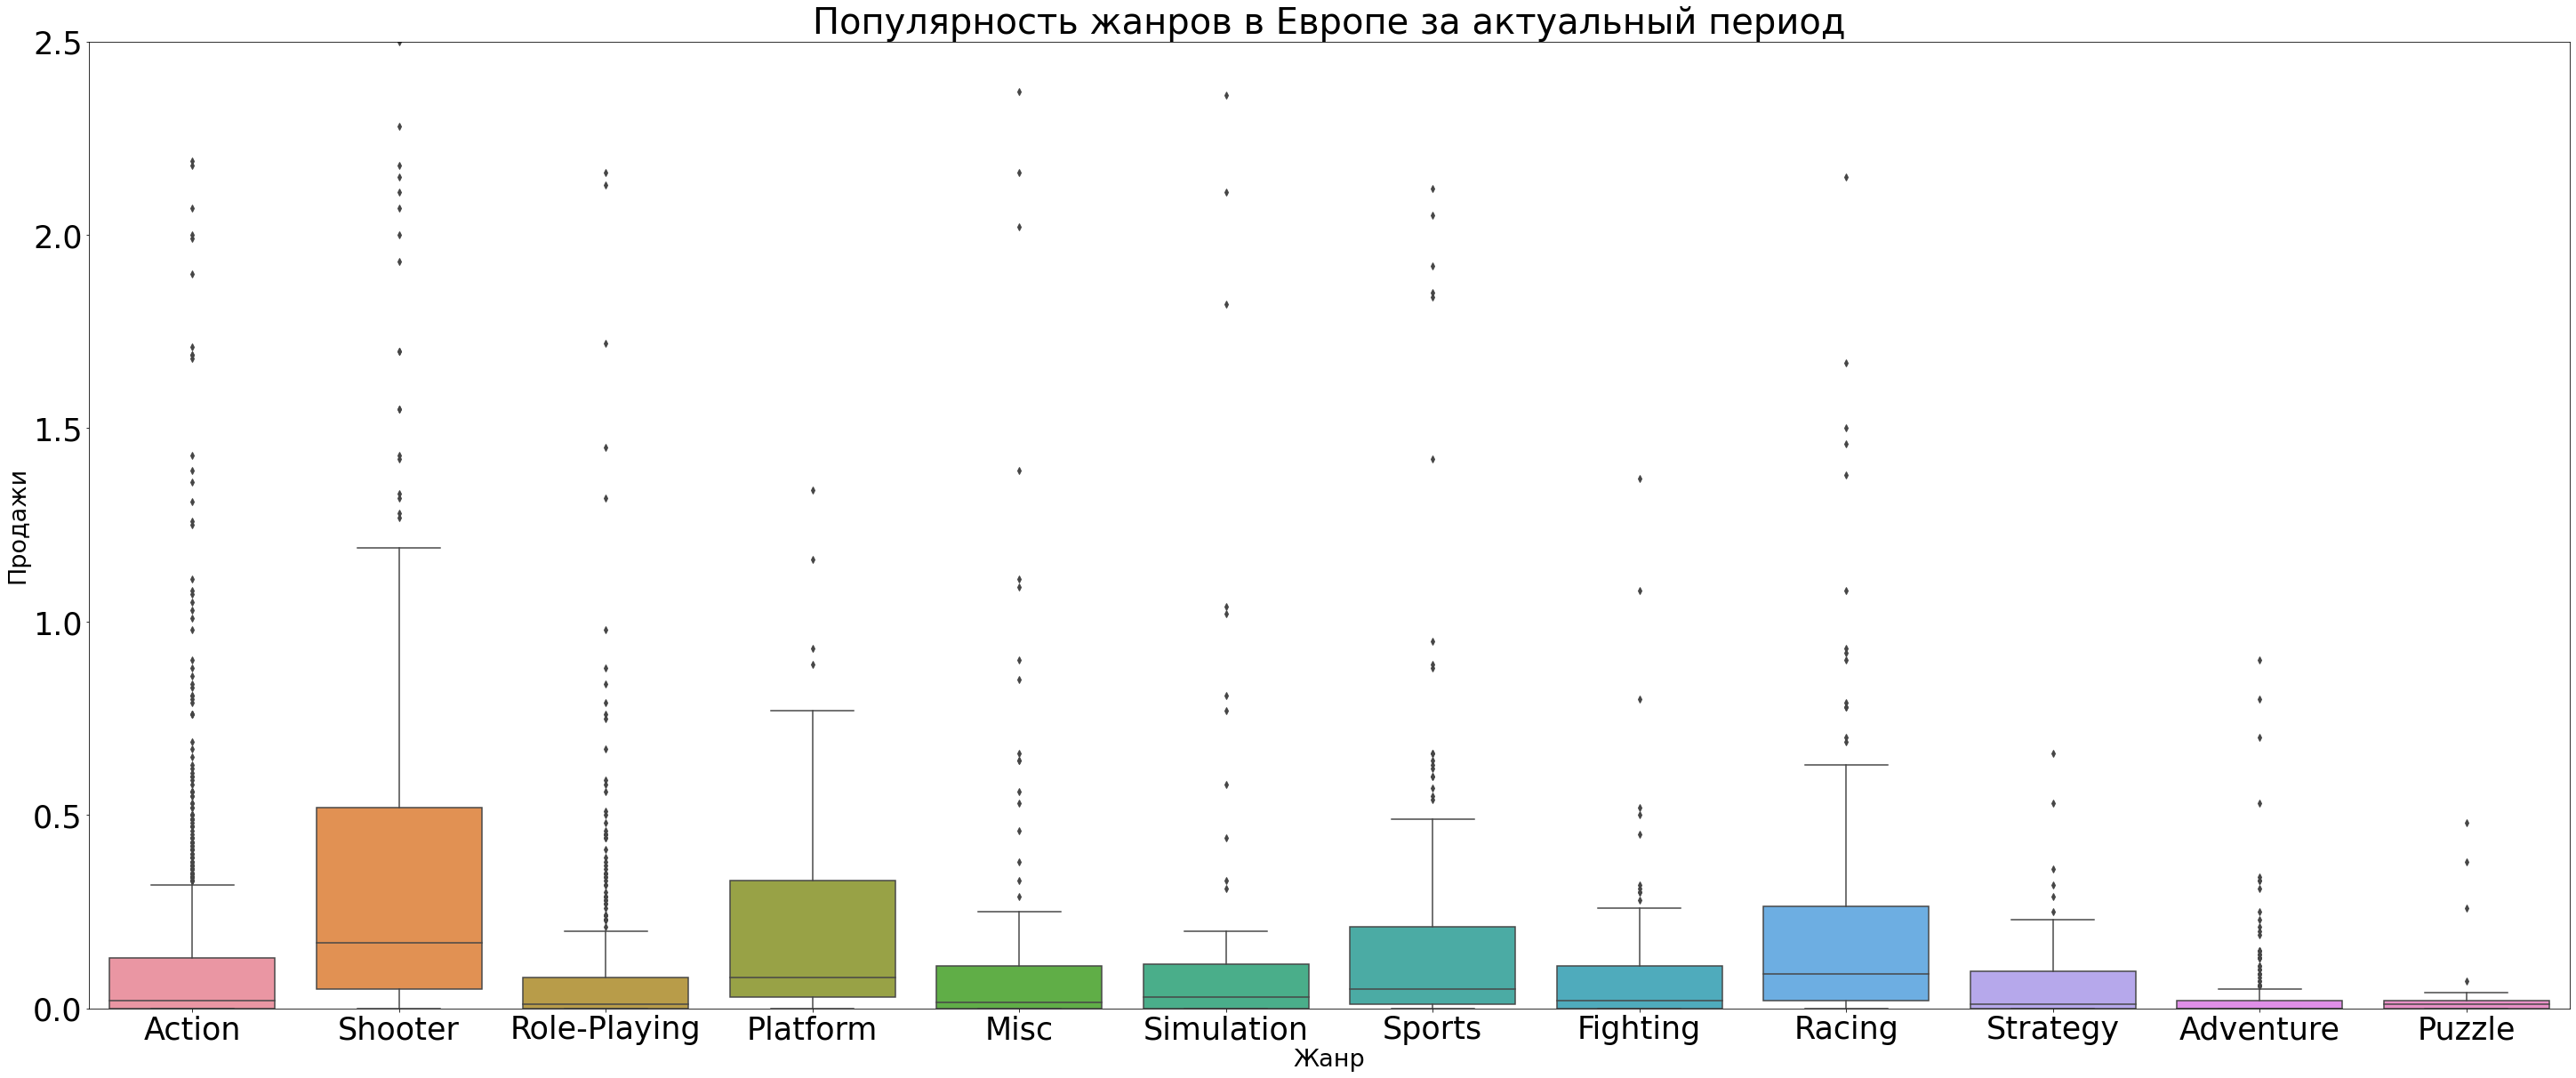

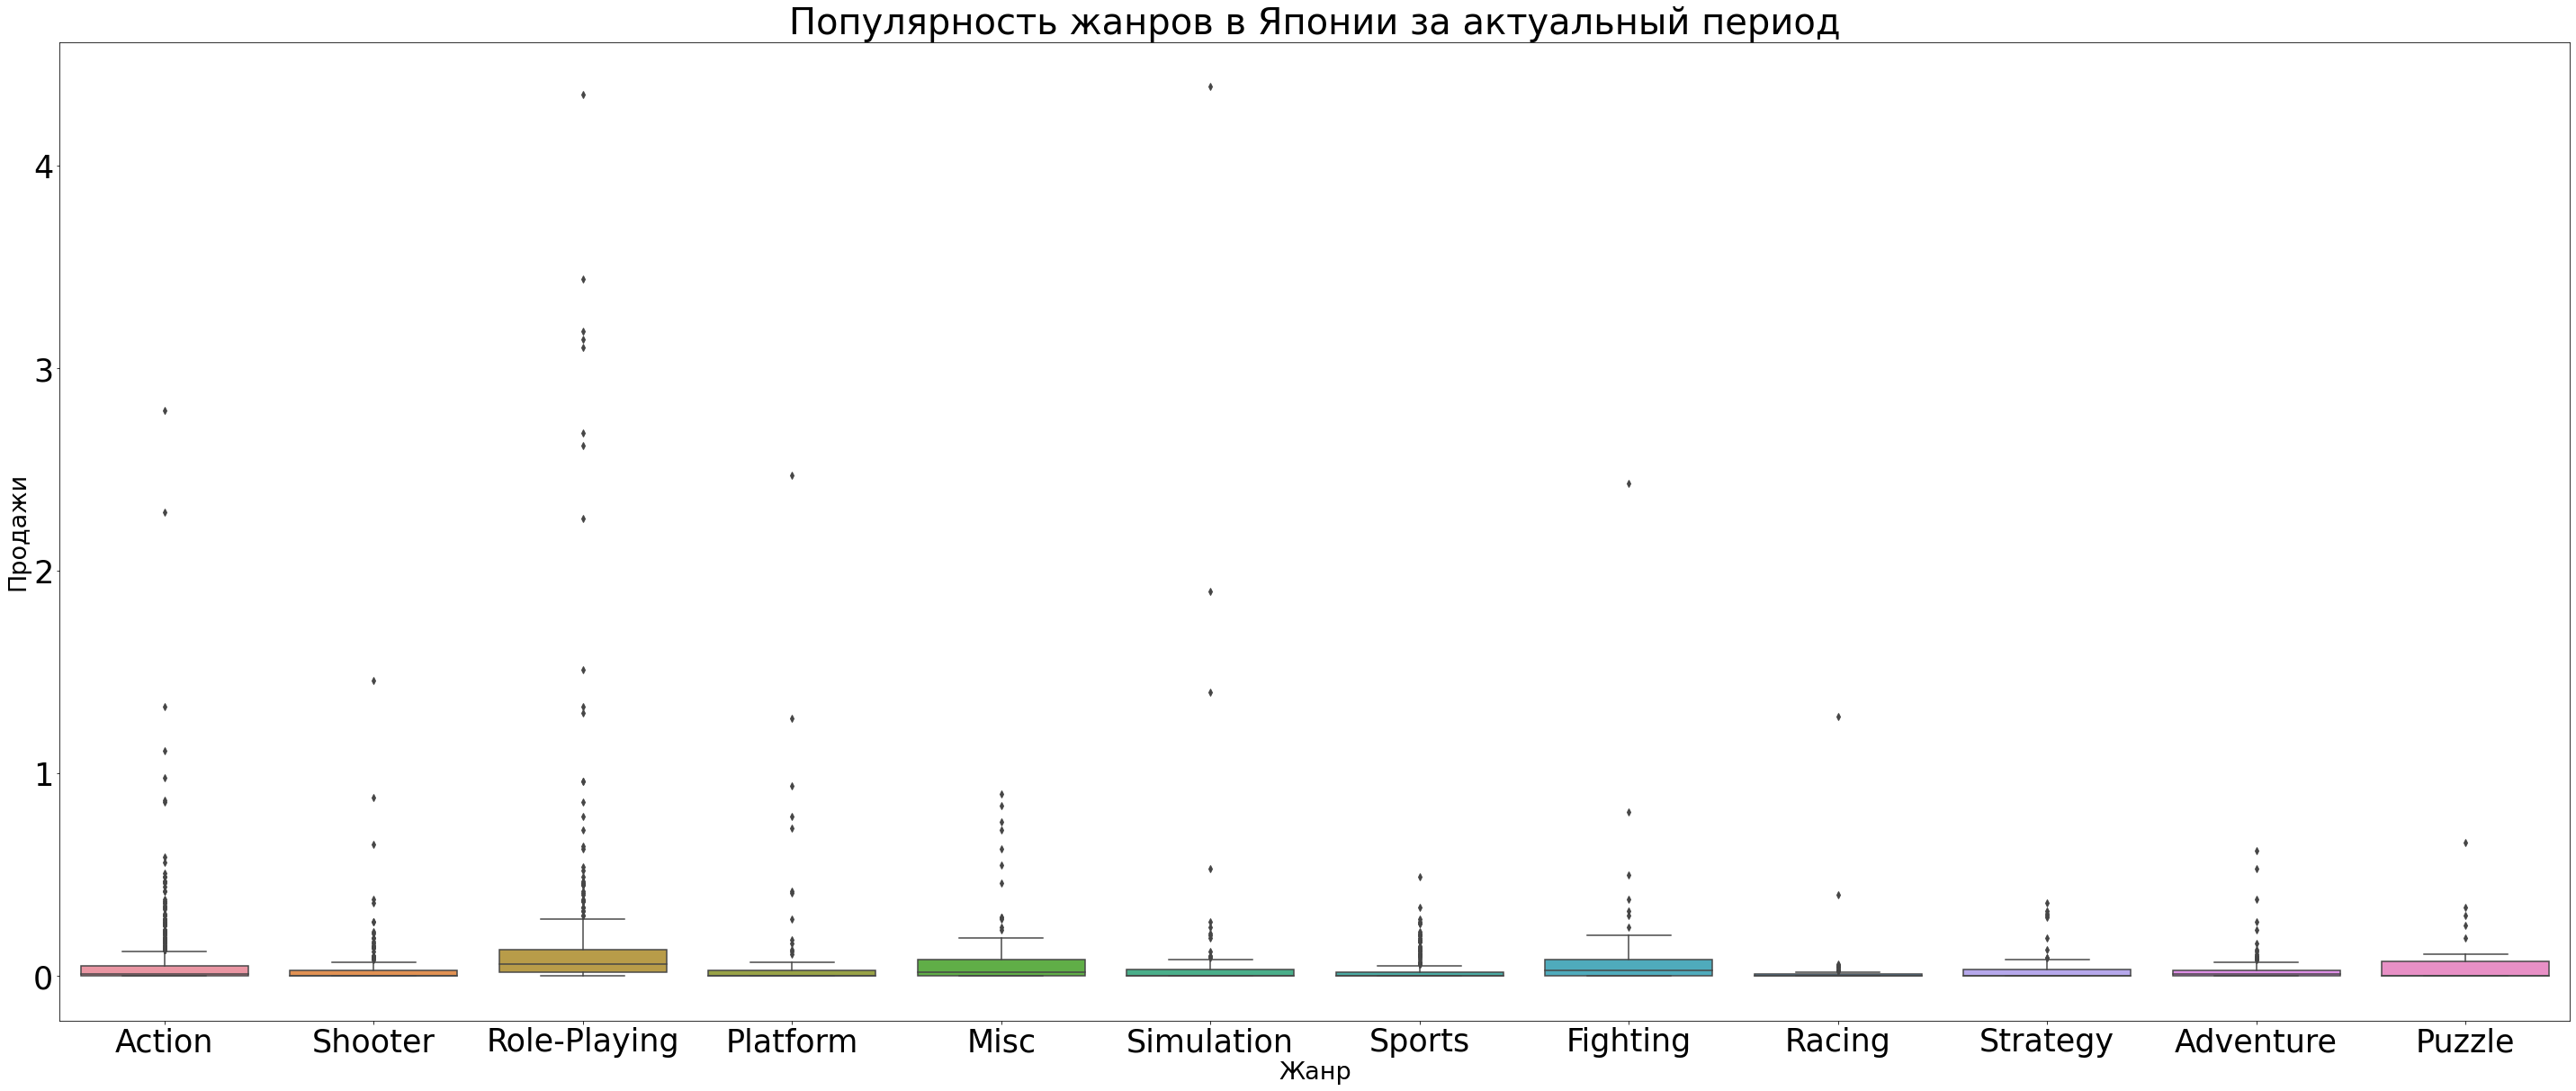

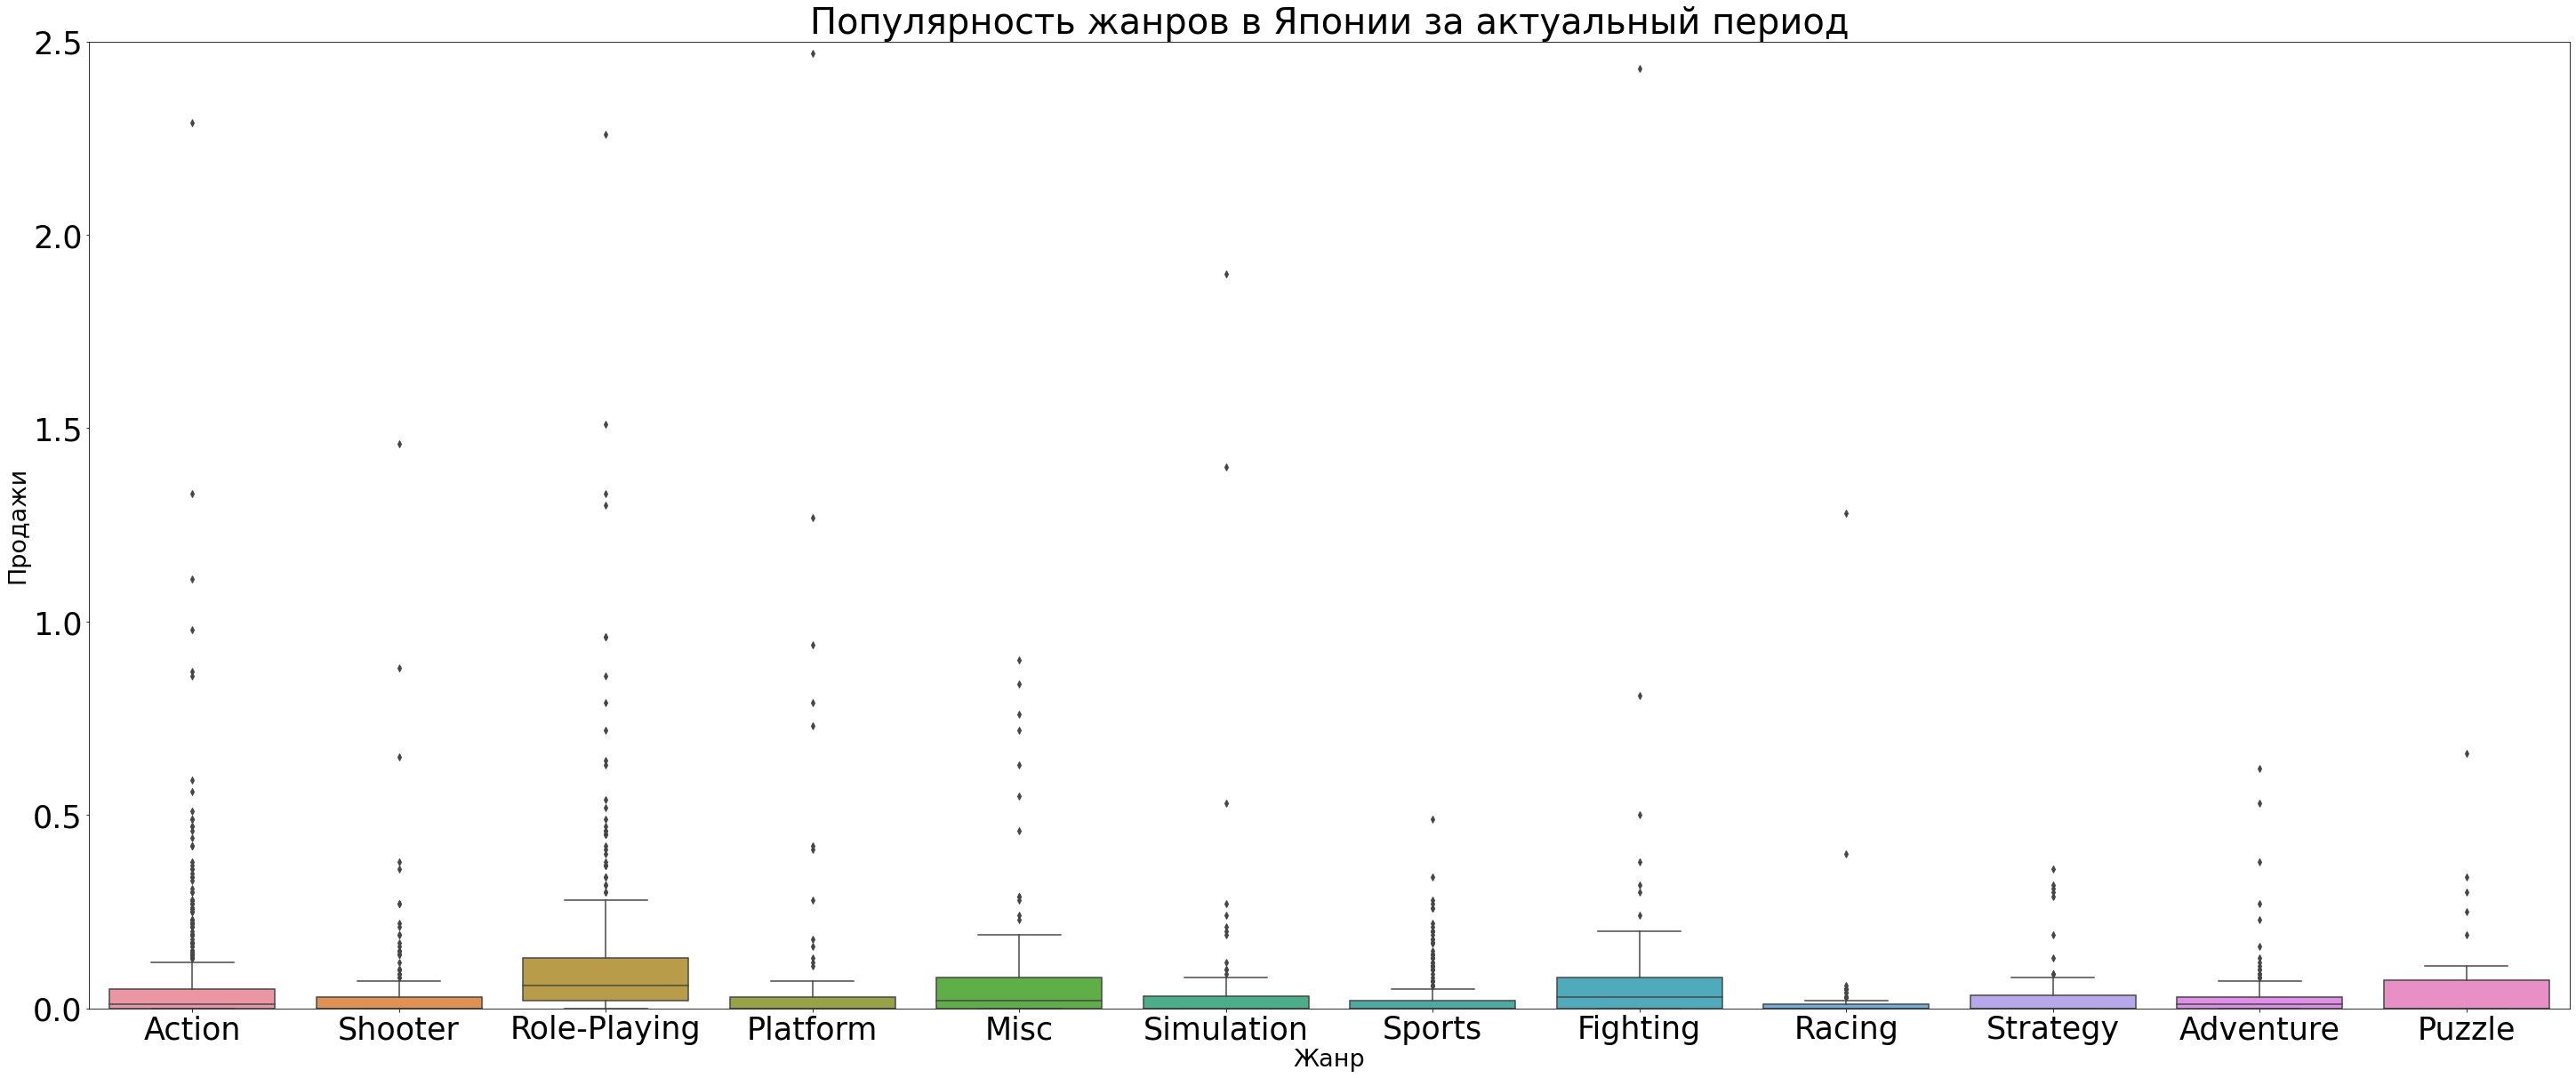

In [51]:
matplotlib.rcParams.update({'font.size': 35})
plt.figure(figsize=(50,20))
sns.boxplot(data=df_actual_period, y='na_sales', x='genre')
plt.title('Популярность жанров в Северной Америке за актуальный период', size=40)
plt.xlabel('Жанр', size=27)
plt.ylabel('Продажи', size=27)
plt.show()


plt.figure(figsize=(50,20))
sns.boxplot(data=df_actual_period, y='na_sales', x='genre').set(ylim=(0,2.5))
plt.title('Популярность жанров в Северной Америке за актуальный период', size=40)
plt.xlabel('Жанр', size=27)
plt.ylabel('Продажи', size=27)
plt.show()



plt.figure(figsize=(50,20))
sns.boxplot(data=df_actual_period, y='eu_sales', x='genre')
plt.title('Популярность жанров в Европе за актуальный период', size=40)
plt.xlabel('Жанр', size=27)
plt.ylabel('Продажи', size=27)
plt.show()


plt.figure(figsize=(50,20))
sns.boxplot(data=df_actual_period, y='eu_sales', x='genre').set(ylim=(0,2.5))
plt.title('Популярность жанров в Европе за актуальный период', size=40)
plt.xlabel('Жанр', size=27)
plt.ylabel('Продажи', size=27)
plt.show()


plt.figure(figsize=(50,20))
sns.boxplot(data=df_actual_period, y='jp_sales', x='genre')
plt.title('Популярность жанров в Японии за актуальный период', size=40)
plt.xlabel('Жанр', size=27)
plt.ylabel('Продажи', size=27)
plt.show()


plt.figure(figsize=(50,20))
sns.boxplot(data=df_actual_period, y='jp_sales', x='genre').set(ylim=(0,2.5))
plt.title('Популярность жанров в Японии за актуальный период', size=40)
plt.xlabel('Жанр', size=27)
plt.ylabel('Продажи', size=27)
plt.show()

In [52]:
df_actual_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 361.8+ KB


In [53]:
df_actual_period['rating'] =  df_actual_period['rating'].fillna('no_ESBR')

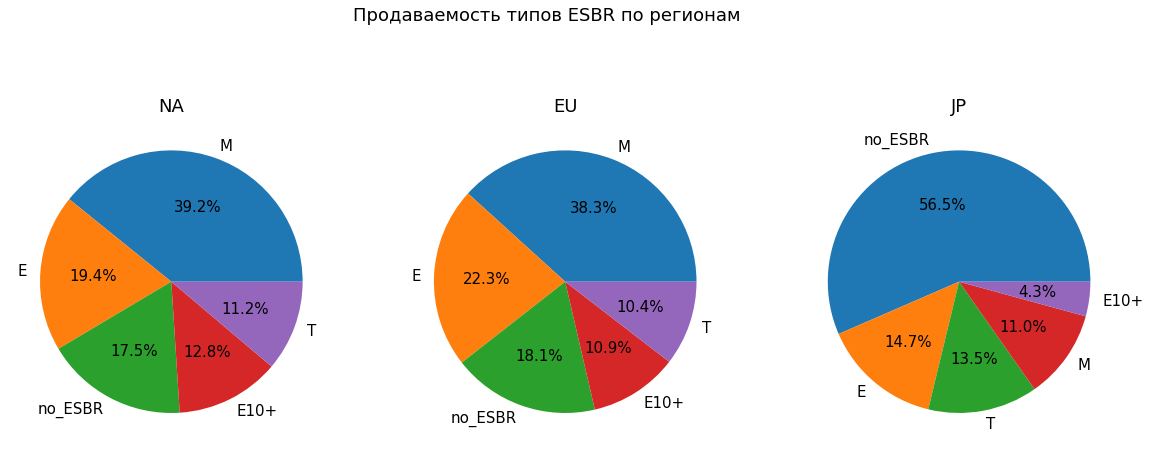

In [54]:
matplotlib.rcParams.update({'font.size': 15})
games_rating = df_actual_period.copy()
countries = games_rating.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Продаваемость типов ESBR по регионам')
for i in range(3):
  # выберем 5 самых продающих платформ
    df_i = (df_actual_period.groupby(['rating'])[countries[i]].sum().reset_index().sort_values(countries[i], ascending=False, ignore_index=True))
    axs[i].pie(df_i[countries[i]], labels = df_i['rating'], autopct='%1.1f%%')
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**Коммент:   
**Как видим в Европе и Америке картина примерно одинаковая, в то время как в Японии колоссальная разница, больше половины продаж - игры без рейтинга. Дело в том, что этот рейтинг присваивается только играм, выпущенным в США и Канаде, а так как у японцев свои вкусы, они вероятно выпускают себе игры сами)**

**Коммент:  
**Игры с рейтингом M,E,T - самые продаваемые. Япония отличилась и тут, распределение топ-3 там другое**

## Шаг. Проверка гипотез

### Первая нулевая гипотеза состоит в том, что у Xbox b PC разные пользовательские рейтинги. Давайте проверим

In [55]:
df_actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,100.0,no_ESBR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,100.0,no_ESBR,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,100.0,no_ESBR,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,100.0,no_ESBR,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,100.0,no_ESBR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,100.0,no_ESBR,0.01


In [56]:
xbox = df_actual_period[(df_actual_period['platform'] == 'XOne') & (df_actual_period['user_score']<11)]
pc = df_actual_period[(df_actual_period['platform'] == 'PC') & (df_actual_period['user_score']<11)]

**Коммент:   
**Избавляемся от заглушек**

### Нулевая гипотеза такова: Мы предпологаем, что у платформ xbox и pc одинаковые пользовательские оценки

In [57]:
alpha = 0.05
from scipy import stats as st
results = st.ttest_ind(xbox['user_score'], pc['user_score'],equal_var=True)
if results.pvalue < alpha:
    print('Отергаем нулевую гипотезу','p-value:',results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу, у Xbox b PC разные пользовательские рейтинги,','p-value:',results.pvalue)

Не получилось отвергнуть нулевую гипотезу, у Xbox b PC разные пользовательские рейтинги, p-value: 0.5535080500643661


### Второй тест, тут нулевая гипотеза такова: У жанров Action и Sports разные пользовательские оценки

In [58]:
action = df_actual_period[(df_actual_period['genre'] == 'Action') & (df_actual_period['user_score']<11)]
sports = df_actual_period[(df_actual_period['genre'] == 'Sports') & (df_actual_period['user_score']<11)]

In [59]:
alpha = 0.05
from scipy import stats as st
results = st.ttest_ind(action['user_score'], sports['user_score'],equal_var=False)
if results.pvalue < alpha:
    print('Отергаем нулевую гипотезу, у жанров одинаковые пользовательские рейтинги,','p-value:',results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу, у жанроы разные пользовательские рейтинги,','p-value:',results.pvalue)

Отергаем нулевую гипотезу, у жанров одинаковые пользовательские рейтинги, p-value: 4.24307776572644e-20


**Коммент:
**Я не исправил этот код ранее, потому что не понимаю в чем дело. Когда сравниваю приставки, и при  equal_var True и при False pvalue получатся сильно больше 0,05. То же самое когда сраваниваем жанры и при true и при false, pvalue очень сильно меньше 0,05. Получается бесмысленно, от того как я возьму нулевую гипотезу зависит результат**

## Шаг. Общий вывод

### Мир игровых платформ пережил бум с 2000 по 2010 год.

### Жизненный цикл платформы в среднем - 7 лет

### В последние годы популярны PS4 и Xone

### Жанры Action и Shooter - самые популярные

### В Японии вкусы на игры отличаются, там самый популярный жанр - Role Playing

### Вкусы на платформы в Японии так же разные, в то время как во всём мире лидируют PS и X360, в Японии самая популярная - DS, а X360 даже не в топ-5

### Самые продаваемые рейтинги ESBR - M(для взрослых), E(для всех) и E10+(от 10 лет и старше).

### У Xone и PC статистическеи разные пользовательские оценки